In [2]:
import numpy as np
import pandas as pd
from sklearn.manifold import LocallyLinearEmbedding
import matplotlib.pyplot as plt
from sklearn.decomposition import  PCA
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [3]:
# Load astronomy data
data = pd.read_csv('../../Data/DR3/espectros_normalizadosNP.csv')
data

0         1         2         3         4         5         6  \
0    1.000000  0.963275  0.903244  0.858556  0.853516  0.869289  0.885497   
1    1.000000  0.771788  0.677324  0.593260  0.529016  0.517378  0.542013   
2    0.942982  1.000000  0.994795  0.939529  0.907774  0.907365  0.906004   
3    0.999049  1.000000  0.989950  0.970693  0.954327  0.926094  0.895425   
4    1.000000  0.959666  0.944849  0.850314  0.782926  0.795160  0.811005   
..        ...       ...       ...       ...       ...       ...       ...   
418  1.000000  0.793286  0.736600  0.642706  0.564153  0.577290  0.629768   
419  0.690252  0.627470  0.624956  0.643108  0.640668  0.604647  0.563618   
420  0.749535  0.907509  1.000000  0.919852  0.774177  0.722561  0.803956   
421  1.000000  0.859806  0.781651  0.768437  0.766682  0.734606  0.697106   
422  1.000000  0.985565  0.932639  0.863997  0.848164  0.894097  0.937643   

            7         8         9  ...       334       335       336  \
0    0.875889  0.862596  0.855179  ...  0.030628  0.027760  0.023020   
1    0.548153  0.548507  0.572690  ...  0.040768  0.040706  0.039856   
2    0.869911  0.841486  0.845002  ...  0.015277  0.014148  0.013310   
3    0.874978  0.884339  0.876736  ...  0.021012  0.021231  0.020369   
4    0.753086  0.709586  0.752360  ...  0.043495  0.043723  0.043515   
..        ...       ...       ...  ...       ...       ...       ...   
418  0.616867  0.586808  0.631431  ...  0.043914  0.043939  0.043193   
419  0.538220  0.538581  0.534361  ...  0.017734  0.015113  0.011871   
420  0.865523  0.800265  0.704964  ...  0.021203  0.009092  0.034128   
421  0.679657  0.697678  0.728420  ...  0.001360  0.000000  0.001476   
422  0.895210  0.821363  0.820764  ...  0.025460  0.028589  0.031182   

          337       338       339       340       341       342  id  
0    0.017343  0.010740  0.003501  0.010620  0.004592  0.000000   2  
1    0.039915  0.041191  0.043393  0.049142  0.056228  0.068138   2  
2    0.013390  0.014468  0.016314  0.019670  0.023328  0.028270   2  
3    0.019049  0.017172  0.014540  0.012097  0.009416  0.007532   2  
4    0.044613  0.047198  0.050640  0.057615  0.065128  0.076822   2  
..        ...       ...       ...       ...       ...       ...  ..  
418  0.043516  0.045236  0.047997  0.054642  0.062641  0.075786   2  
419  0.008784  0.006130  0.004269  0.003894  0.005141  0.008529   2  
420  0.021466  0.010451  0.003308  0.000000  0.003766  0.013197   2  
421  0.006973  0.016963  0.031134  0.050534  0.071787  0.097027   2  
422  0.033739  0.035692  0.035853  0.035538  0.032508  0.028768   2  

[423 rows x 344 columns]

In [4]:
df_data = pd.DataFrame(data)

In [5]:
data_t =  data.T

In [17]:
data_t =  data_t.drop(labels='id', axis=0)
data.drop(columns='id', inplace=True)

In [7]:
data_t

0         1         2         3         4         5         6    \
0    1.000000  1.000000  0.942982  0.999049  1.000000  0.669524  1.000000   
1    0.963275  0.771788  1.000000  1.000000  0.959666  0.666131  0.986600   
2    0.903244  0.677324  0.994795  0.989950  0.944849  0.604834  0.919111   
3    0.858556  0.593260  0.939529  0.970693  0.850314  0.540111  0.852730   
4    0.853516  0.529016  0.907774  0.954327  0.782926  0.546783  0.839755   
..        ...       ...       ...       ...       ...       ...       ...   
338  0.010740  0.041191  0.014468  0.017172  0.047198  0.316047  0.027385   
339  0.003501  0.043393  0.016314  0.014540  0.050640  0.312482  0.024184   
340  0.010620  0.049142  0.019670  0.012097  0.057615  0.323335  0.020603   
341  0.004592  0.056228  0.023328  0.009416  0.065128  0.330237  0.015645   
342  0.000000  0.068138  0.028270  0.007532  0.076822  0.352020  0.010803   

          7         8         9    ...       413       414       415  \
0    0.973853  1.000000  0.221909  ...  0.575147  0.962408  1.000000   
1    0.996618  0.851776  0.200556  ...  0.508421  1.000000  0.805548   
2    1.000000  0.773983  0.207990  ...  0.501192  0.951690  0.715868   
3    0.965865  0.694910  0.222740  ...  0.451446  0.888888  0.707664   
4    0.915916  0.648701  0.237580  ...  0.407244  0.869918  0.737863   
..        ...       ...       ...  ...       ...       ...       ...   
338  0.017279  0.043904  0.017214  ...  0.040777  0.158025  0.032691   
339  0.017553  0.045901  0.017398  ...  0.041513  0.169527  0.034515   
340  0.018966  0.052256  0.018180  ...  0.048005  0.172328  0.037122   
341  0.020474  0.060596  0.018619  ...  0.058672  0.153752  0.038044   
342  0.023201  0.074536  0.019894  ...  0.077371  0.122150  0.039104   

          416       417       418       419       420       421       422  
0    0.991008  0.127992  1.000000  0.690252  0.749535  1.000000  1.000000  
1    1.000000  0.179653  0.793286  0.627470  0.907509  0.859806  0.985565  
2    0.930337  0.188310  0.736600  0.624956  1.000000  0.781651  0.932639  
3    0.819935  0.152741  0.642706  0.643108  0.919852  0.768437  0.863997  
4    0.770767  0.131148  0.564153  0.640668  0.774177  0.766682  0.848164  
..        ...       ...       ...       ...       ...       ...       ...  
338  0.042806  0.795411  0.045236  0.006130  0.010451  0.016963  0.035692  
339  0.028811  0.793561  0.047997  0.004269  0.003308  0.031134  0.035853  
340  0.016159  0.818012  0.054642  0.003894  0.000000  0.050534  0.035538  
341  0.005014  0.821805  0.062641  0.005141  0.003766  0.071787  0.032508  
342  0.000000  0.853018  0.075786  0.008529  0.013197  0.097027  0.028768  

[343 rows x 423 columns]

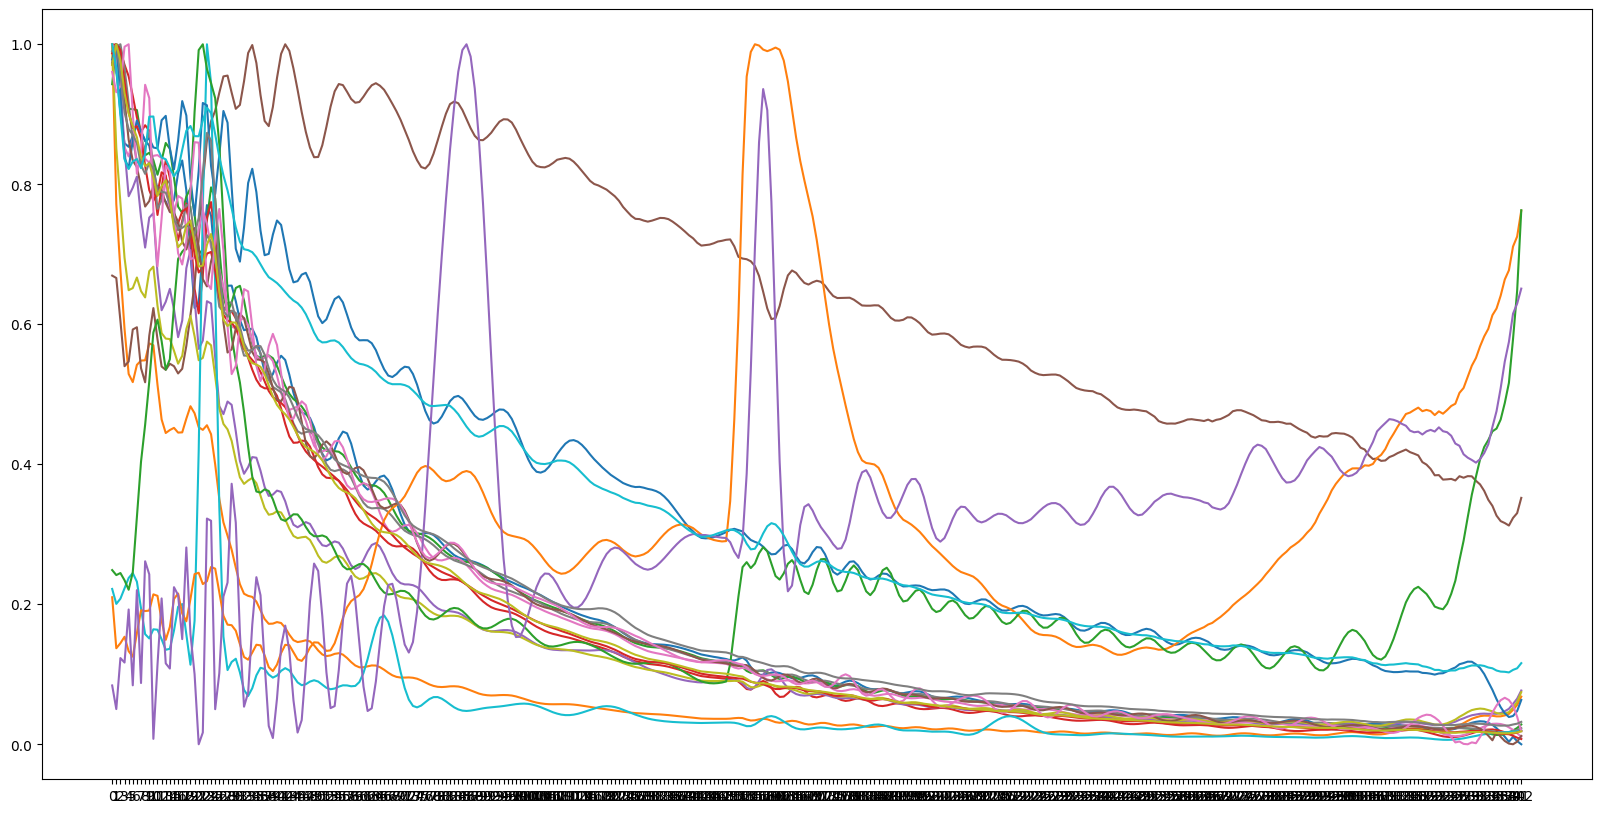

In [8]:
plt.figure(figsize=(20,10))
plt.plot(data_t.iloc[:, 0:20])

n_components = 1
Explained variance ratio: 0.63118
n_components = 2
Explained variance ratio: 0.86656
n_components = 3
Explained variance ratio: 0.92558
n_components = 4
Explained variance ratio: 0.94123
n_components = 5
Explained variance ratio: 0.95386
n_components = 6
Explained variance ratio: 0.96275
n_components = 7
Explained variance ratio: 0.96978
n_components = 8
Explained variance ratio: 0.97464
n_components = 9
Explained variance ratio: 0.97791
n_components = 10
Explained variance ratio: 0.98015
n_components = 11
Explained variance ratio: 0.98174
n_components = 12
Explained variance ratio: 0.98322
n_components = 13
Explained variance ratio: 0.98461
n_components = 14
Explained variance ratio: 0.98578
n_components = 15
Explained variance ratio: 0.98689
n_components = 16
Explained variance ratio: 0.98788
n_components = 17
Explained variance ratio: 0.98874
n_components = 18
Explained variance ratio: 0.98959
n_components = 19
Explained variance ratio: 0.99031
n_components = 20
Exp

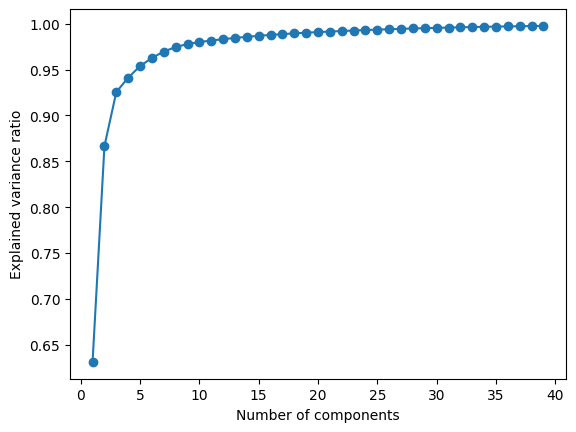

In [9]:
# assume that `data` contains your data
data = df_data.copy()
explained_variances = []
for n_components in range(1, 40):
    pca = PCA(n_components=n_components)
    features_reduced = pca.fit_transform(data)
    explained_variances.append(pca.explained_variance_ratio_.sum())
    print(f"n_components = {n_components}")
    print(f"Explained variance ratio: {explained_variances[-1]:.5f}")

# plot the explained variance ratio as a function of the number of components
import matplotlib.pyplot as plt
plt.plot(range(1, 40), explained_variances, 'o-')
plt.xlabel('Number of components')
plt.ylabel('Explained variance ratio')
plt.show()


In [10]:
data = df_data.copy()
explained_variances = []
for n_components in range(1, 41):
    pca = PCA(n_components=n_components)
    features_reduced = pca.fit_transform(data)
    explained_variances.append(pca.explained_variance_ratio_.sum())
    print(f"n_components = {n_components}")
    print(f"Explained variance ratio: {explained_variances[-1]:.6f}")

n_components = 1
Explained variance ratio: 0.631182
n_components = 2
Explained variance ratio: 0.866560
n_components = 3
Explained variance ratio: 0.925575
n_components = 4
Explained variance ratio: 0.941233
n_components = 5
Explained variance ratio: 0.953865
n_components = 6
Explained variance ratio: 0.962749
n_components = 7
Explained variance ratio: 0.969784
n_components = 8
Explained variance ratio: 0.974639
n_components = 9
Explained variance ratio: 0.977908
n_components = 10
Explained variance ratio: 0.980152
n_components = 11
Explained variance ratio: 0.981740
n_components = 12
Explained variance ratio: 0.983221
n_components = 13
Explained variance ratio: 0.984612
n_components = 14
Explained variance ratio: 0.985781
n_components = 15
Explained variance ratio: 0.986892
n_components = 16
Explained variance ratio: 0.987883
n_components = 17
Explained variance ratio: 0.988742
n_components = 18
Explained variance ratio: 0.989590
n_components = 19
Explained variance ratio: 0.990305
n_

In [11]:
pca = PCA()
pipeline = Pipeline(steps=[('pca', pca)])

param_grid = {
    'pca__n_components': np.arange(10,80),
    'pca__svd_solver': ['auto', 'full', 'arpack', 'randomized']
}

grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5)

grid_search.fit(data)
best_params = grid_search.best_params_

best_pca = PCA(n_components=best_params['pca__n_components'], svd_solver=best_params['pca__svd_solver'])
new_pipeline = Pipeline(steps=[('pca', best_pca)])
new_pipeline.fit(data)
print(new_pipeline.named_steps['pca'])


PCA(n_components=37, svd_solver='arpack')


In [18]:
from sklearn.decomposition import PCA
pca_data = PCA(n_components=37, svd_solver='arpack')
pca_transformed = pca_data.fit_transform(data)
pca_transformed_data = pd.DataFrame(pca_transformed)

In [19]:
pca_transformed_data

0         1         2         3         4         5         6   \
0   -3.011126 -1.420412 -0.728584 -0.197972 -0.173844 -0.066602 -0.104449   
1   -3.764016  1.300208 -0.296918 -0.514734  0.322301 -0.092331  0.425866   
2   -3.090418 -1.456769 -0.826543 -0.134572 -0.148875 -0.138379 -0.160690   
3   -3.363663 -1.076814 -0.866659 -0.183026 -0.069574 -0.215883 -0.126720   
4   -3.264972 -0.226305 -0.599589 -0.301723  0.134266 -0.191347  0.165883   
..        ...       ...       ...       ...       ...       ...       ...   
418 -3.675747  0.954860 -0.408967 -0.428499  0.298309 -0.151861  0.367396   
419 -3.373382  0.128571 -0.236412 -0.268444  0.003087  0.277054  0.150443   
420 -3.342086 -0.710022 -0.680060 -0.259268 -0.068899 -0.086448 -0.098274   
421 -3.130725 -0.452024 -0.488570 -0.351157 -0.015470 -0.023292  0.084908   
422 -3.044920 -1.297549 -0.776047 -0.175832 -0.108936 -0.123785 -0.087090   

           7         8         9   ...        27        28        29  \
0   -0.197128  0.028040 -0.060631  ...  0.077838 -0.000398 -0.012358   
1   -0.015208  0.075804 -0.116949  ...  0.005440 -0.001238 -0.016150   
2   -0.180926 -0.010727 -0.005083  ...  0.029134 -0.017516  0.041039   
3   -0.225412 -0.009683 -0.067602  ...  0.029247 -0.035154 -0.003247   
4   -0.217846 -0.059946  0.009046  ...  0.029296  0.010651 -0.013311   
..        ...       ...       ...  ...       ...       ...       ...   
418 -0.029566  0.048668 -0.064793  ...  0.009780  0.004433 -0.004784   
419  0.460906  0.377230  0.150090  ... -0.062097 -0.038364 -0.027447   
420 -0.142953  0.031458 -0.023863  ...  0.058370  0.040452  0.001507   
421 -0.140537  0.016543 -0.127110  ...  0.003787 -0.051936 -0.024341   
422 -0.200416 -0.016706 -0.036752  ... -0.001186  0.046271 -0.046189   

           30        31        32        33        34        35        36  
0    0.024264  0.041962 -0.091678  0.018864 -0.005605  0.028542 -0.030063  
1   -0.027186 -0.010303  0.033107 -0.016666 -0.011688  0.007943 -0.002153  
2    0.009744 -0.002760 -0.016639  0.014579  0.008053 -0.042695  0.030048  
3    0.023632  0.036275  0.011573  0.023101 -0.007831 -0.031768  0.017747  
4    0.006851  0.004619  0.045357 -0.044213  0.008217  0.011677  0.000794  
..        ...       ...       ...       ...       ...       ...       ...  
418 -0.004553 -0.002735  0.021248 -0.008817 -0.000595 -0.004061  0.009708  
419 -0.039811  0.022946 -0.007447  0.078480 -0.008686  0.017850  0.026677  
420 -0.027884  0.033151 -0.099555 -0.053383 -0.011232  0.027499  0.014142  
421  0.000609  0.052507 -0.007123 -0.038407  0.014928 -0.030729 -0.029304  
422 -0.005571  0.011988 -0.013651  0.059679 -0.004355 -0.008117 -0.034224  

[423 rows x 37 columns]

In [20]:
pca_transformed_data.shape

(423, 37)

In [21]:
original_data = pca_data.inverse_transform(pca_transformed)
original_data

array([[ 0.9889054 ,  0.9601391 ,  0.90879845, ...,  0.01015802,
         0.00265641, -0.0024299 ],
       [ 0.99518652,  0.77536556,  0.67152471, ...,  0.04862789,
         0.05598846,  0.06865915],
       [ 0.94049458,  0.99890695,  0.99421086, ...,  0.01959835,
         0.02348388,  0.03078519],
       ...,
       [ 0.75881811,  0.90247615,  1.00188278, ...,  0.00550052,
         0.0125289 ,  0.02404875],
       [ 0.99015094,  0.84480439,  0.77714247, ...,  0.04906927,
         0.06440859,  0.08183304],
       [ 1.00205449,  0.98718412,  0.94919191, ...,  0.036888  ,
         0.03351042,  0.03076173]])

In [22]:
pca_transformed_data_t = pca_transformed_data.T
pca_transformed_data_t

0         1         2         3         4         5         6    \
0  -3.011126 -3.764016 -3.090418 -3.363663 -3.264972  5.247153 -3.135670   
1  -1.420412  1.300208 -1.456769 -1.076814 -0.226305 -4.688223 -1.283085   
2  -0.728584 -0.296918 -0.826543 -0.866659 -0.599589  0.405972 -0.784054   
3  -0.197972 -0.514734 -0.134572 -0.183026 -0.301723 -0.363422 -0.164496   
4  -0.173844  0.322301 -0.148875 -0.069574  0.134266 -0.837921 -0.131368   
5  -0.066602 -0.092331 -0.138379 -0.215883 -0.191347  0.540754 -0.116713   
6  -0.104449  0.425866 -0.160690 -0.126720  0.165883 -0.279398 -0.128536   
7  -0.197128 -0.015208 -0.180926 -0.225412 -0.217846  0.234786 -0.161766   
8   0.028040  0.075804 -0.010727 -0.009683 -0.059946  0.194278  0.012126   
9  -0.060631 -0.116949 -0.005083 -0.067602  0.009046 -0.198949 -0.069348   
10 -0.035240 -0.111142  0.050318  0.006588 -0.041722 -0.016571 -0.010981   
11  0.015002 -0.003583 -0.076363 -0.018511  0.022363 -0.010092 -0.043079   
12 -0.116262  0.073344 -0.094013 -0.159717 -0.094821  0.146986 -0.026727   
13  0.078920 -0.006113 -0.020729  0.063275 -0.041821  0.010078  0.055691   
14  0.040429 -0.001561  0.007560 -0.030572 -0.071831 -0.327907  0.043153   
15  0.067637 -0.008453  0.015268 -0.000753 -0.007529  0.003737  0.018091   
16 -0.019902  0.004225  0.054422  0.073183  0.021780  0.006087  0.007217   
17 -0.067053 -0.020937 -0.048928 -0.096628 -0.027329 -0.110426  0.038660   
18  0.030260  0.021572  0.017178  0.027482  0.024643  0.050251 -0.028152   
19 -0.025232 -0.027040  0.044034  0.059145 -0.017353 -0.058720 -0.011964   
20  0.046737 -0.001902  0.005926 -0.020672  0.058721  0.001860 -0.044455   
21  0.056612  0.000120 -0.013956  0.003586 -0.013046 -0.060092 -0.008122   
22 -0.055410  0.048979 -0.037357 -0.054855 -0.019726  0.068156 -0.052251   
23 -0.002856  0.032925 -0.036117 -0.057418 -0.042247 -0.015179  0.074143   
24 -0.002306  0.014291 -0.030696 -0.028557  0.025771  0.000492 -0.011152   
25 -0.036511  0.030272  0.004298 -0.006398  0.024575  0.062621  0.027373   
26 -0.039999 -0.013273  0.033528  0.005447  0.069014 -0.016579 -0.000649   
27  0.077838  0.005440  0.029134  0.029247  0.029296 -0.004654  0.012539   
28 -0.000398 -0.001238 -0.017516 -0.035154  0.010651  0.085005 -0.001114   
29 -0.012358 -0.016150  0.041039 -0.003247 -0.013311 -0.052170 -0.007879   
30  0.024264 -0.027186  0.009744  0.023632  0.006851  0.096110  0.019452   
31  0.041962 -0.010303 -0.002760  0.036275  0.004619  0.007150  0.037235   
32 -0.091678  0.033107 -0.016639  0.011573  0.045357  0.017862 -0.070306   
33  0.018864 -0.016666  0.014579  0.023101 -0.044213 -0.002086  0.031697   
34 -0.005605 -0.011688  0.008053 -0.007831  0.008217 -0.020162  0.019292   
35  0.028542  0.007943 -0.042695 -0.031768  0.011677 -0.017754 -0.025504   
36 -0.030063 -0.002153  0.030048  0.017747  0.000794 -0.025522 -0.023379   

         7         8         9    ...       413       414       415       416  \
0  -3.064102 -3.206206 -3.629838  ... -3.180700 -1.923332 -3.369193 -1.978959   
1  -1.273047  0.086087  2.104962  ... -0.391477 -2.292996 -0.438248 -1.372541   
2  -0.760843 -0.415003  0.538123  ... -0.427436 -0.610850 -0.666884 -0.741151   
3  -0.206512 -0.368054 -0.568151  ...  0.185481  0.004652 -0.175114 -0.358449   
4  -0.092280  0.112940  0.166609  ... -0.105079 -0.295741  0.040226  0.138850   
5  -0.172872 -0.059411  0.761821  ...  0.467655  0.028672 -0.112213 -0.056378   
6  -0.089703  0.225881  0.523289  ... -0.132674 -0.127010  0.015899 -0.099402   
7  -0.212566 -0.075164  0.936044  ...  0.887389 -0.202412  0.034715 -0.210947   
8  -0.017539  0.030415  0.653742  ...  0.457478 -0.161668  0.073055  0.005114   
9  -0.038013 -0.084633  0.258524  ...  0.148597  0.064268 -0.012961 -0.060831   
10  0.036682 -0.081373  0.065435  ...  0.129681  0.115205 -0.020806 -0.014795   
11 -0.013342  0.001801  0.166867  ...  0.007923 -0.085420 -0.050585  0.020680   
12 -0.123344  0.027641 -0.205035  ...  0.165733 -0.003672  0.122618

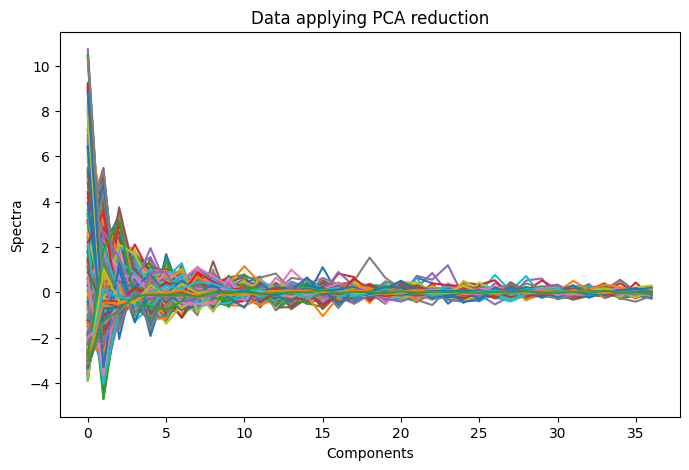

In [24]:
plt.figure(figsize=(8,5))
plt.title("Data applying PCA reduction")
plt.xlabel("Components")
plt.ylabel("Spectra")
plt.plot(pca_transformed_data_t.iloc[:,:])
plt.show()

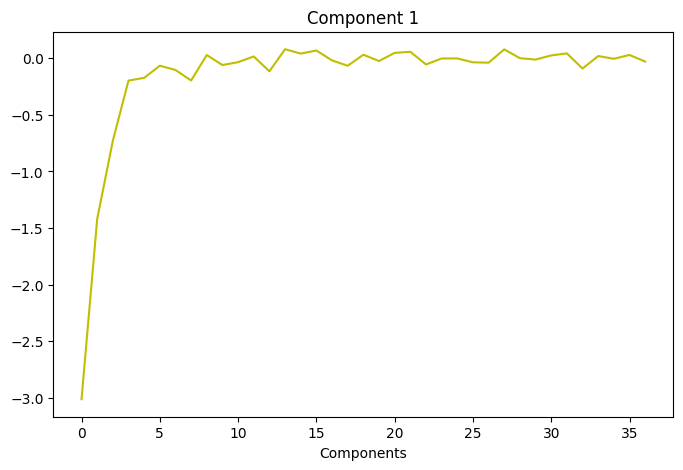

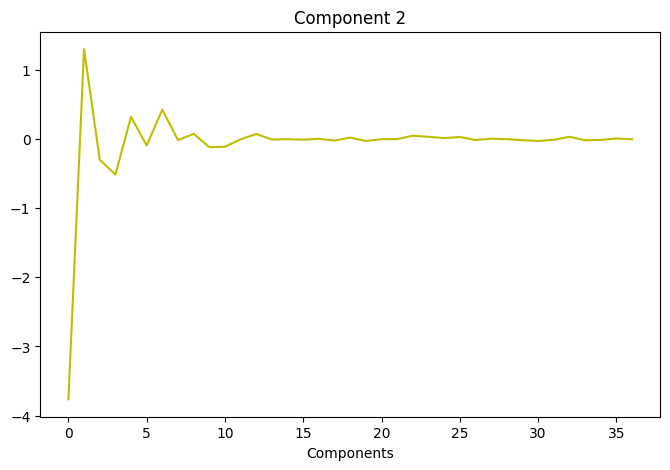

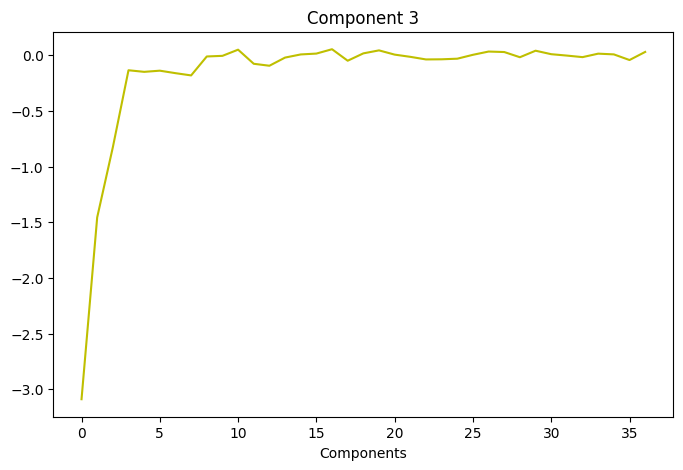

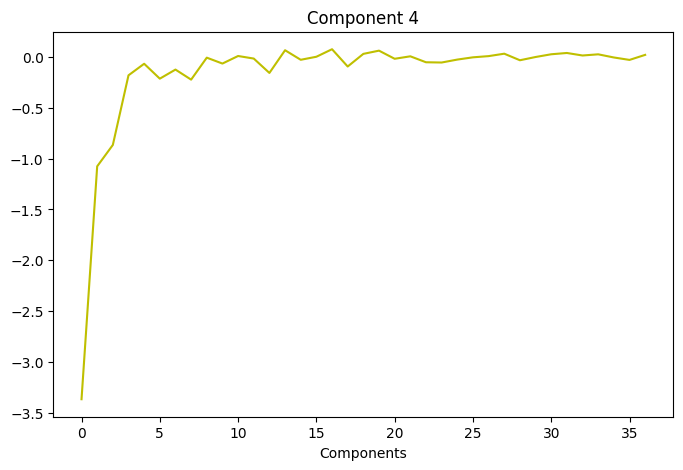

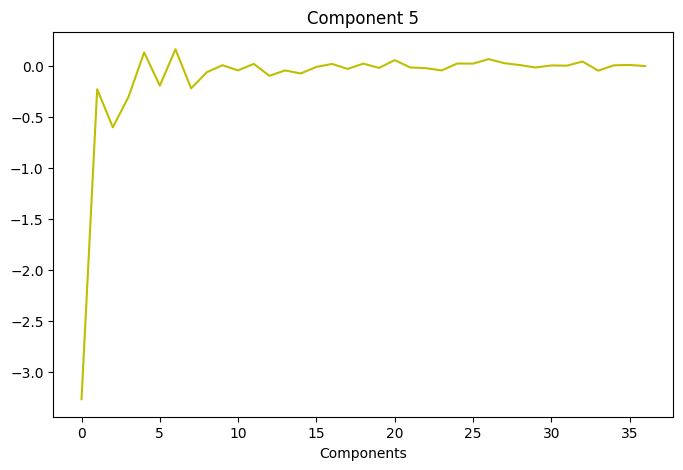

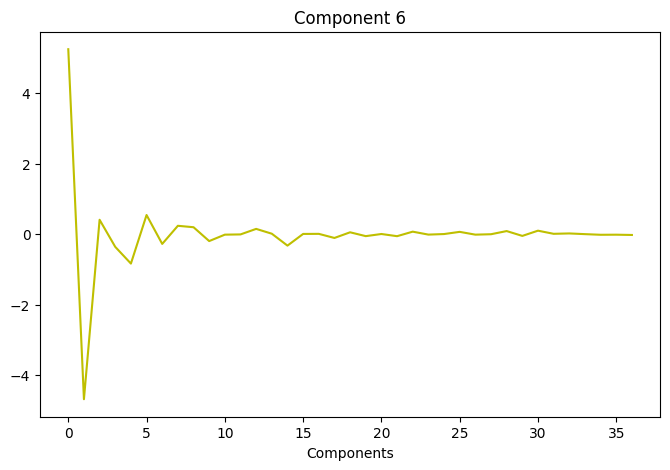

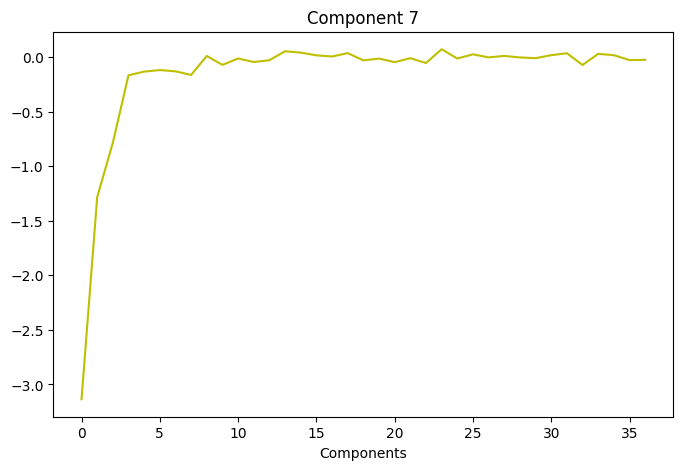

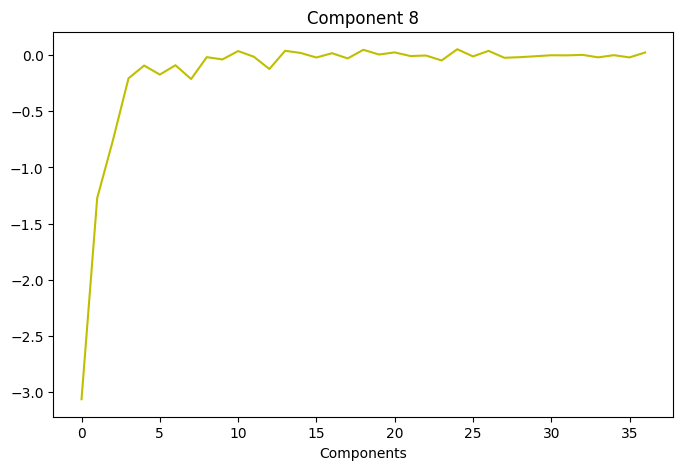

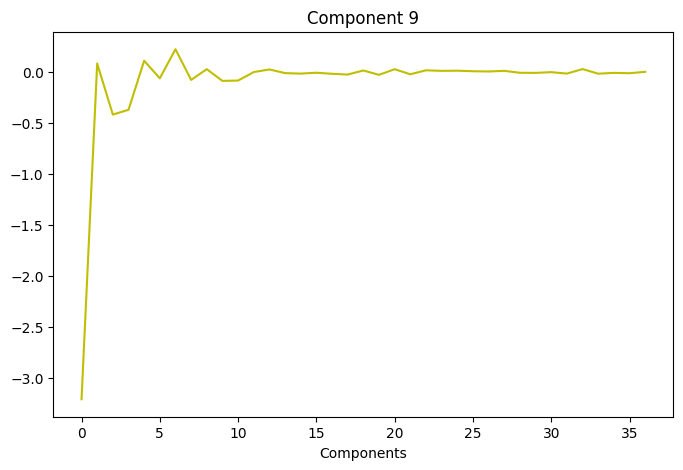

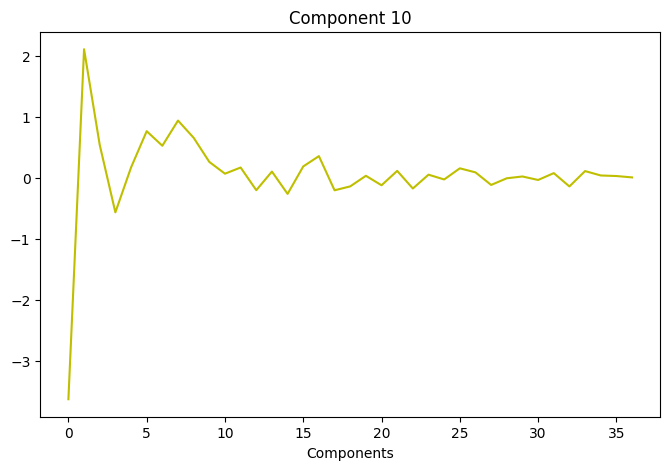

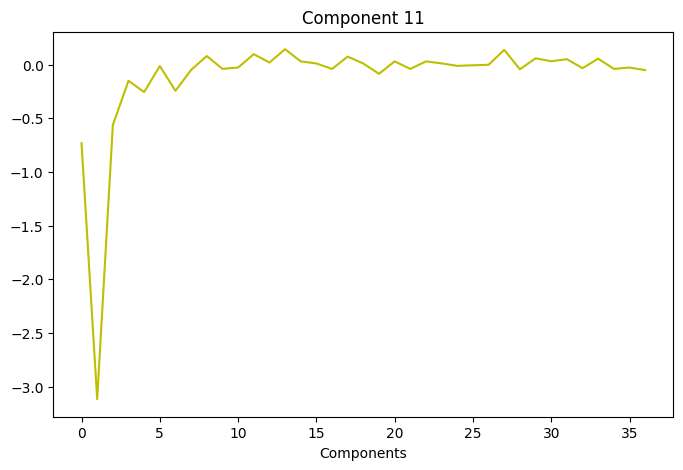

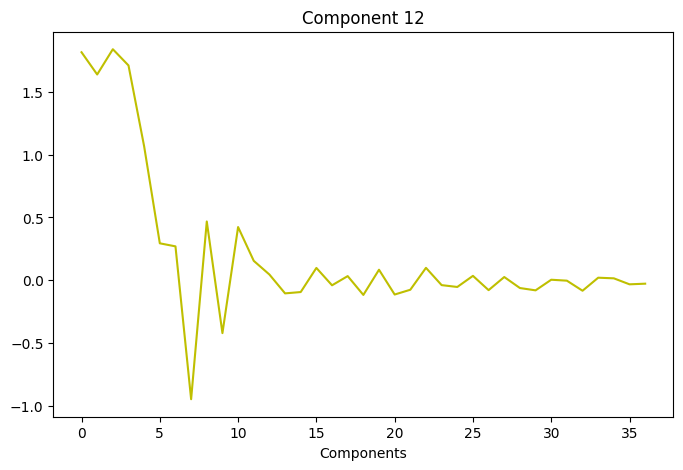

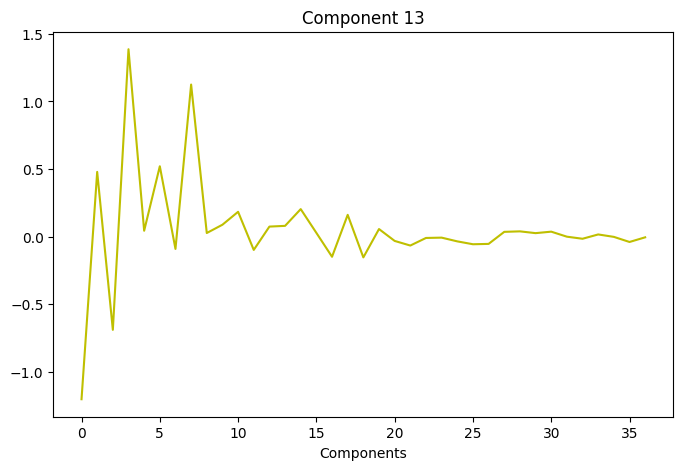

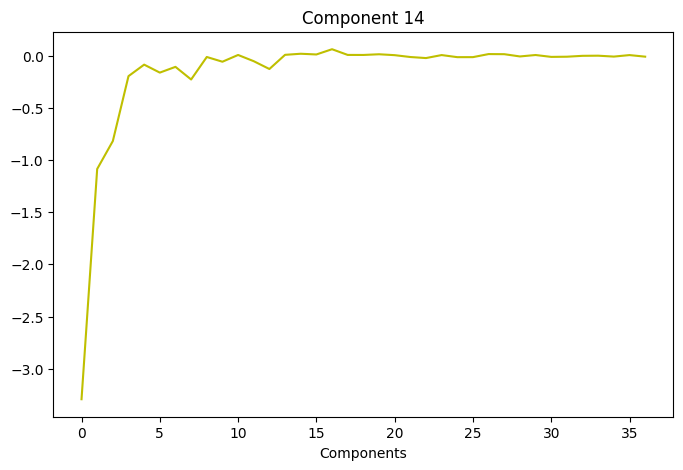

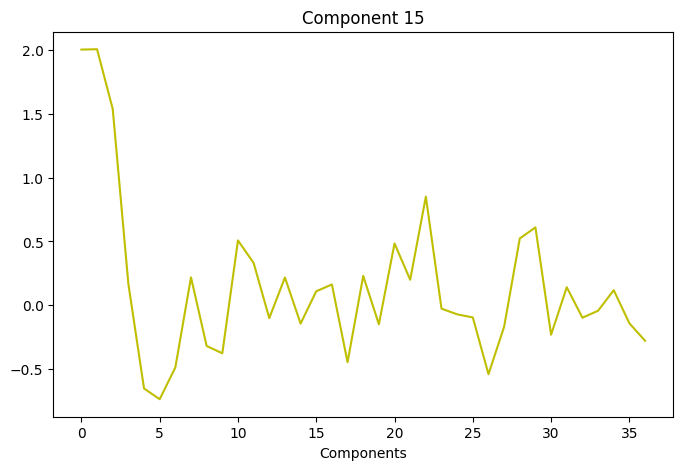

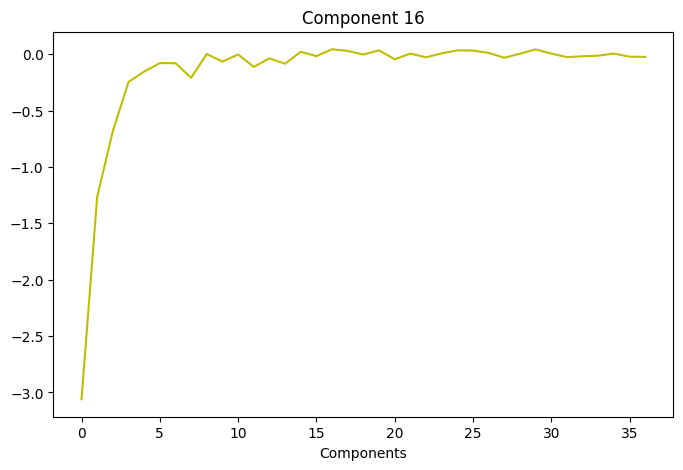

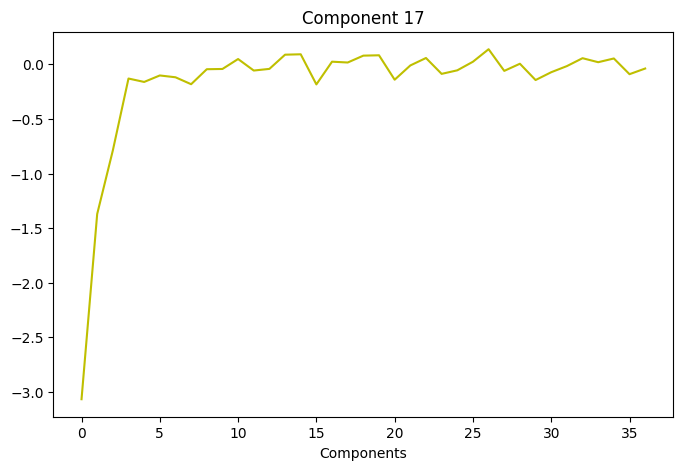

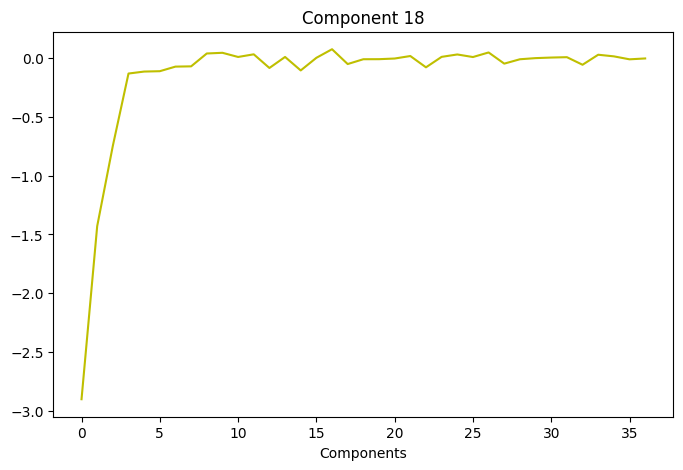

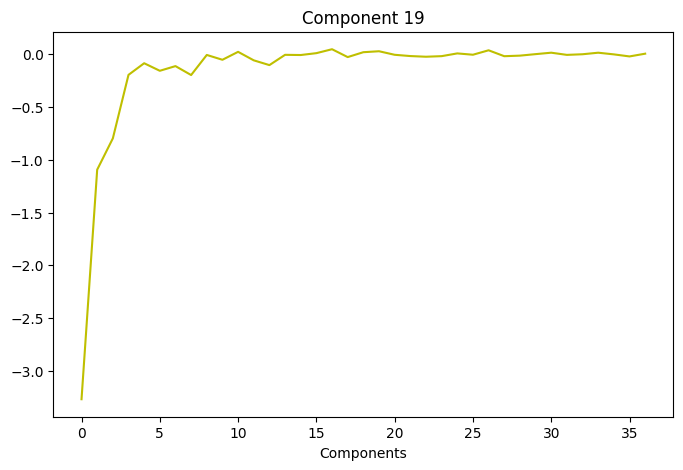

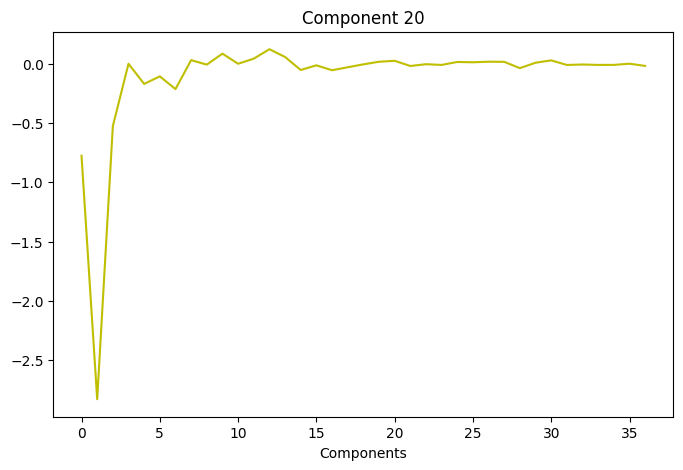

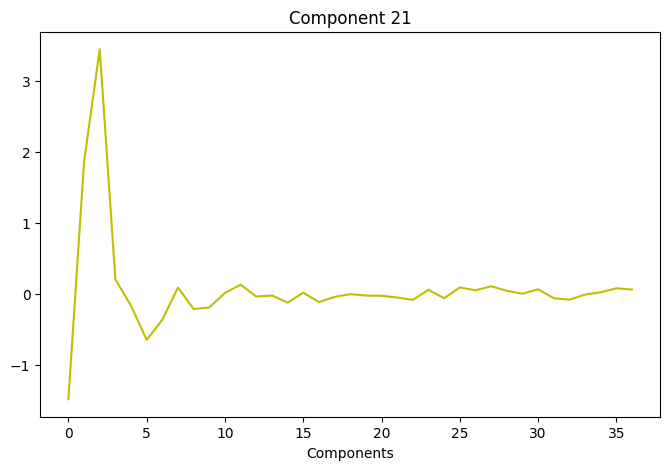

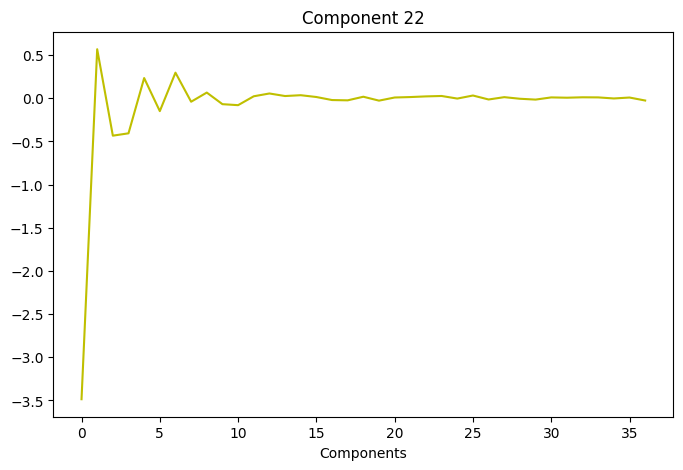

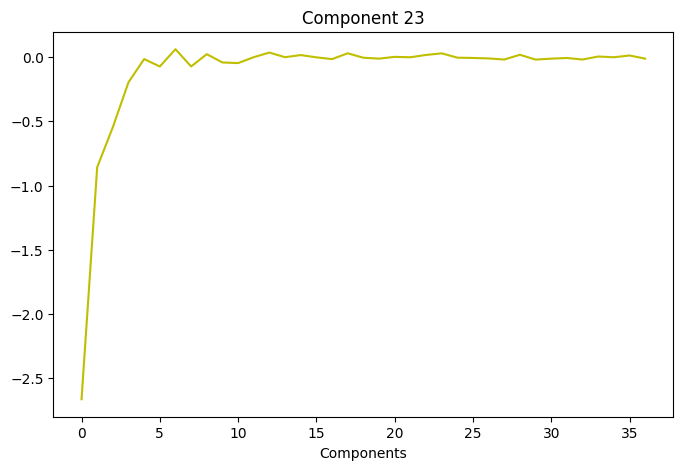

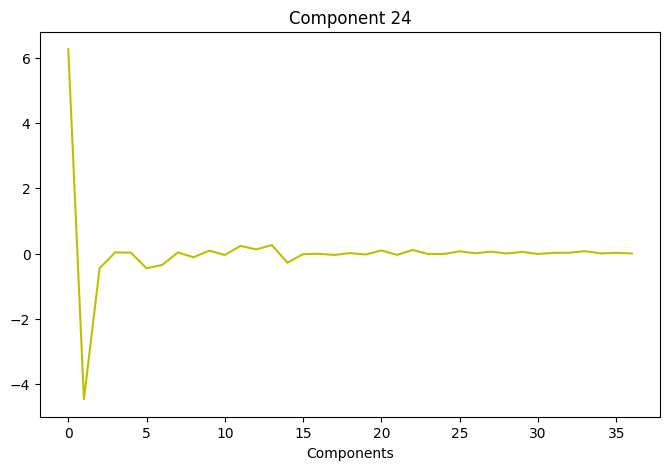

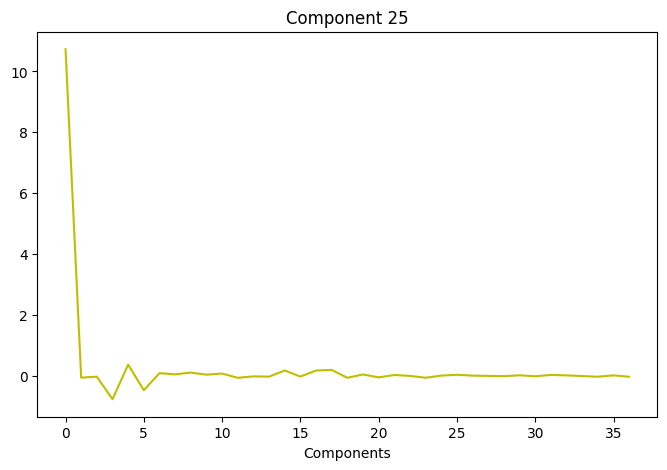

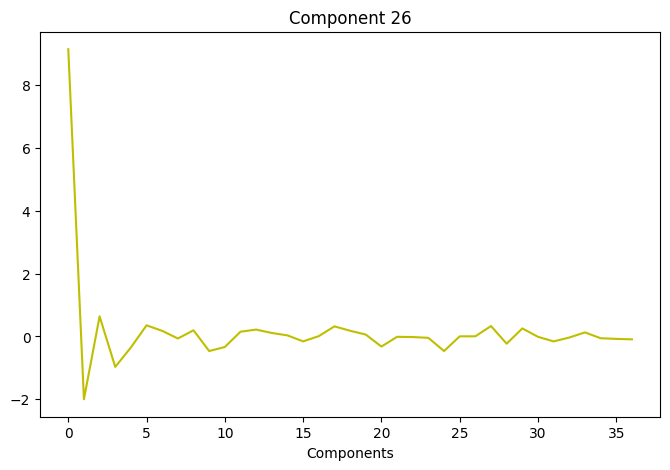

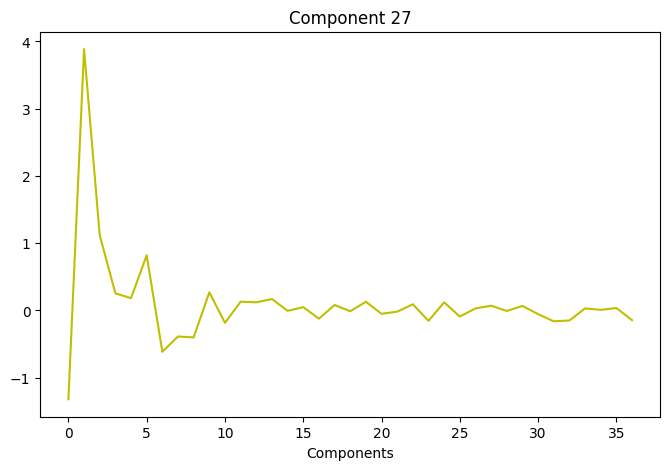

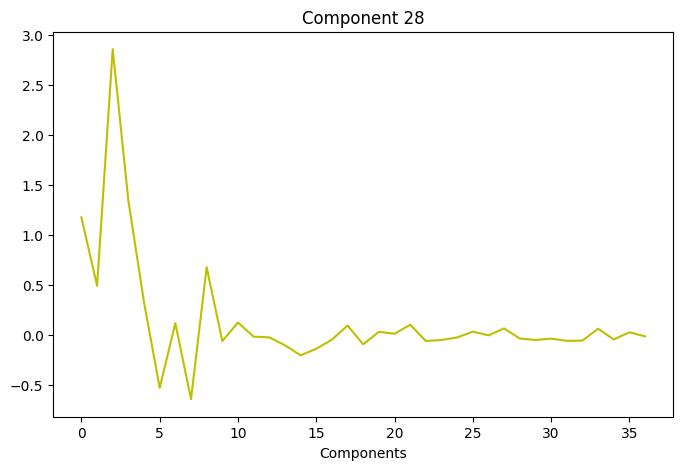

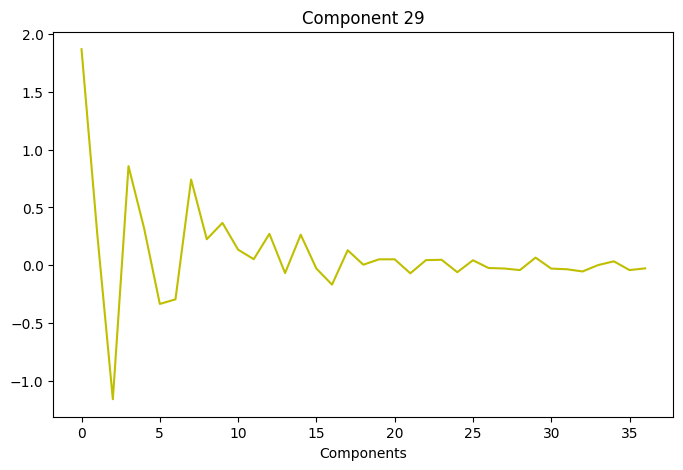

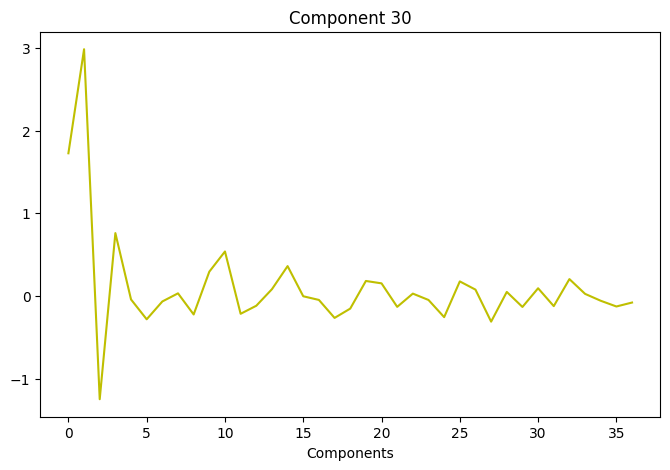

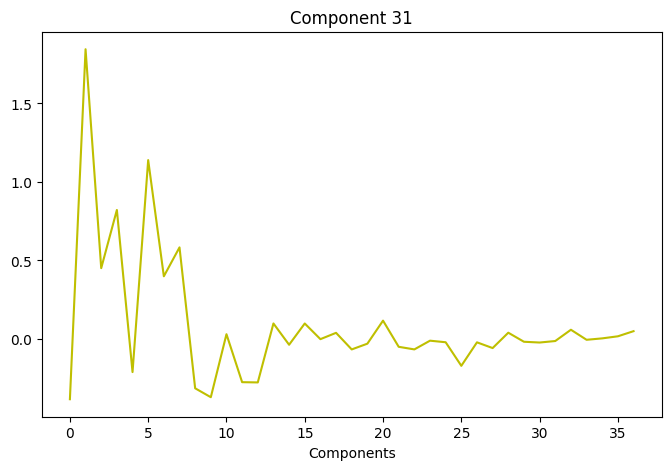

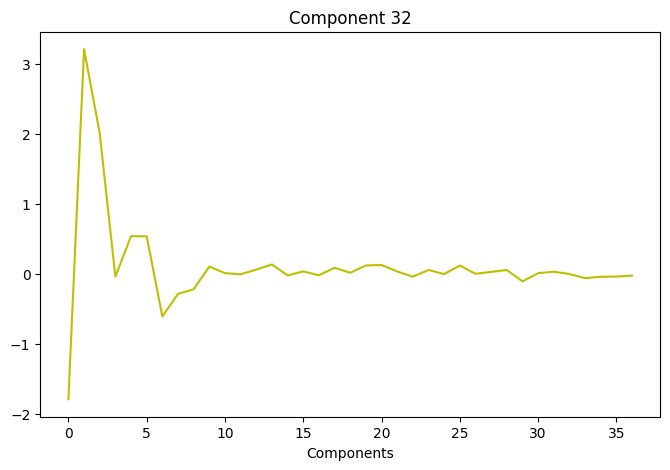

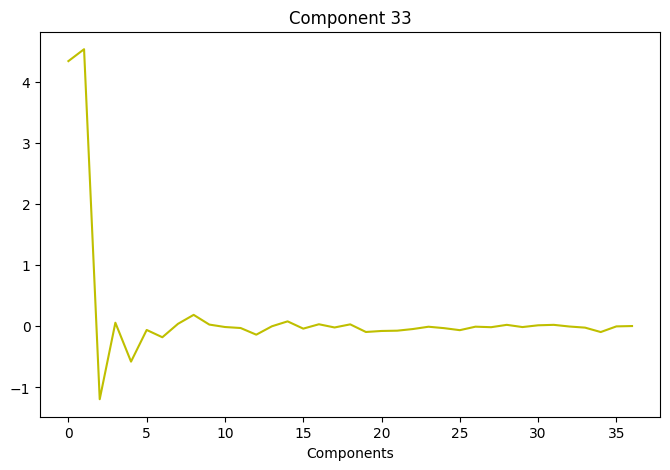

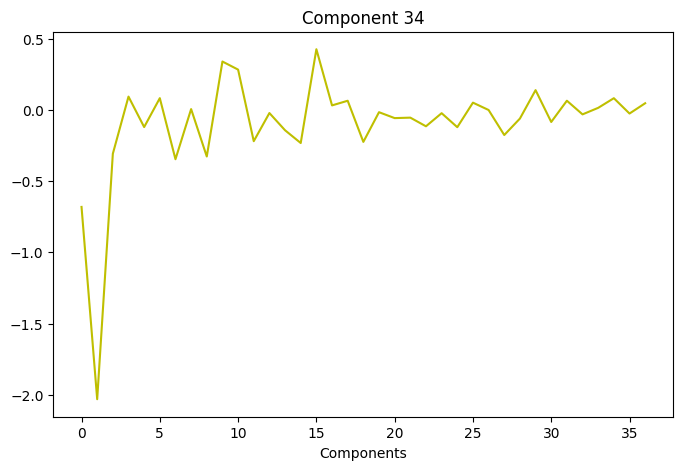

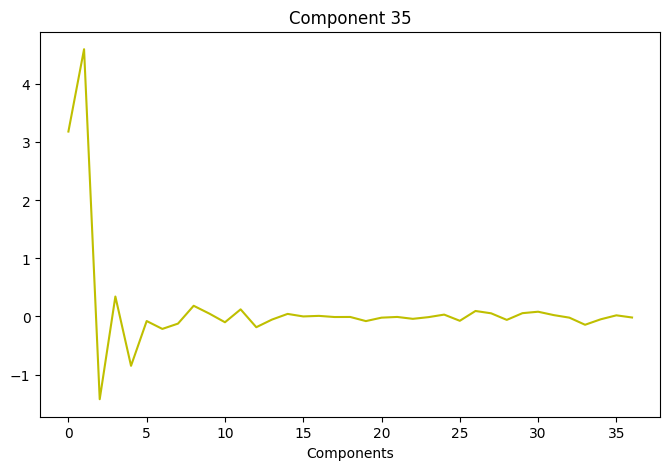

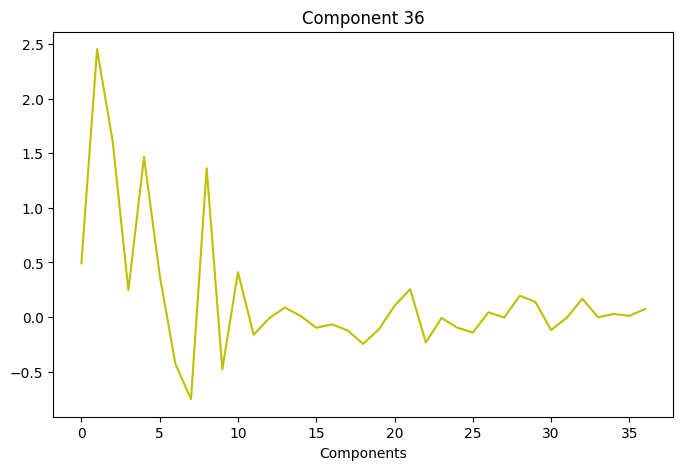

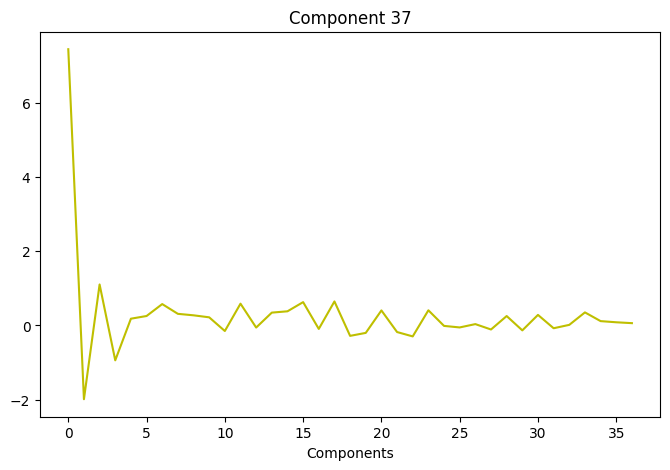

In [26]:
for i in range(1,38):
    plt.figure(figsize=(8,5))
    plt.title(f"Component {i}")
    plt.xlabel("Components")
    plt.plot(pca_transformed_data_t.iloc[:,i-1:i], '-',markersize=1, color = "y")
    plt.show()

In [27]:
# Perform LLE on the data
lle = LocallyLinearEmbedding(n_components=10, n_neighbors=70)
lle_transformed = lle.fit_transform(data)
lle_transformed_data = pd.DataFrame(lle_transformed)

In [30]:
lle_transformed_data

0         1         2         3         4         5         6  \
0   -0.027370  0.048325 -0.022427 -0.006900  0.002183  0.033615  0.000895   
1    0.038531  0.039606 -0.042972 -0.040469  0.053622 -0.046133  0.024876   
2   -0.029065  0.050446 -0.022204  0.002090  0.001428  0.050563  0.003106   
3   -0.021085  0.052507 -0.026445 -0.004422  0.013431  0.053006  0.013389   
4    0.000278  0.044594 -0.032196 -0.025281  0.040110  0.023639  0.021621   
..        ...       ...       ...       ...       ...       ...       ...   
418  0.030048  0.040938 -0.040855 -0.031303  0.050354 -0.029540  0.016838   
419  0.013504  0.040091 -0.025687  0.009107 -0.011057 -0.115440 -0.011122   
420 -0.011288  0.048117 -0.030161 -0.012478  0.009473  0.019520  0.007305   
421 -0.003638  0.042643 -0.029144 -0.020909  0.016421  0.011129  0.008055   
422 -0.024905  0.048261 -0.025124 -0.004959  0.010207  0.048020 -0.006586   

            7         8         9  
0    0.030380 -0.033162 -0.052039  
1   -0.032639  0.038990  0.014539  
2    0.016059 -0.059619 -0.008803  
3    0.001440 -0.070887 -0.056913  
4   -0.022100 -0.016356 -0.012467  
..        ...       ...       ...  
418 -0.043226  0.022433  0.020822  
419 -0.000600 -0.124602 -0.092702  
420  0.072374  0.111312 -0.132523  
421  0.033385  0.067421  0.010376  
422  0.014242  0.018954  0.007021  

[423 rows x 10 columns]

In [29]:
lle_transformed_data_t = lle_transformed_data.T

In [31]:
lle_transformed_data_t

0         1         2         3         4         5         6    \
0 -0.027370  0.038531 -0.029065 -0.021085  0.000278 -0.113140 -0.024246   
1  0.048325  0.039606  0.050446  0.052507  0.044594 -0.036001  0.049190   
2 -0.022427 -0.042972 -0.022204 -0.026445 -0.032196  0.018573 -0.024809   
3 -0.006900 -0.040469  0.002090 -0.004422 -0.025281 -0.030484  0.001227   
4  0.002183  0.053622  0.001428  0.013431  0.040110 -0.017437  0.000914   
5  0.033615 -0.046133  0.050563  0.053006  0.023639 -0.073067  0.038626   
6  0.000895  0.024876  0.003106  0.013389  0.021621 -0.061215 -0.008762   
7  0.030380 -0.032639  0.016059  0.001440 -0.022100  0.037416  0.033391   
8 -0.033162  0.038990 -0.059619 -0.070887 -0.016356  0.028492  0.032776   
9 -0.052039  0.014539 -0.008803 -0.056913 -0.012467  0.043433 -0.036689   

        7         8         9    ...       413       414       415       416  \
0 -0.024666  0.009260  0.061699  ...  0.003793 -0.046454 -0.002574 -0.027061   
1  0.048949  0.040268  0.029953  ...  0.038054  0.039623  0.045248  0.035681   
2 -0.024049 -0.032348 -0.027172  ... -0.015383 -0.008644 -0.029662 -0.017657   
3 -0.007457 -0.028168 -0.016276  ...  0.085858  0.006900  0.010995 -0.016746   
4  0.013179  0.032156 -0.029767  ... -0.064443 -0.007313  0.006412  0.015475   
5  0.050435 -0.013332 -0.199837  ... -0.128774  0.036720  0.012645  0.047738   
6  0.013950  0.018475 -0.009408  ... -0.062673 -0.006323 -0.018414  0.014656   
7  0.011867 -0.001965 -0.033141  ...  0.019570  0.029864 -0.007887  0.005930   
8 -0.033625  0.010706 -0.174868  ... -0.031165 -0.010804  0.057226 -0.013459   
9 -0.030189  0.003319 -0.082226  ... -0.005927  0.009929  0.065642 -0.005825   

        417       418       419       420       421       422  
0 -0.045026  0.030048  0.013504 -0.011288 -0.003638 -0.024905  
1 -0.125699  0.040938  0.040091  0.048117  0.042643  0.048261  
2 -0.003563 -0.040855 -0.025687 -0.030161 -0.029144 -0.025124  
3 -0.077637 -0.031303  0.009107 -0.012478 -0.020909 -0.004959  
4  0.021921  0.050354 -0.011057  0.009473  0.016421  0.010207  
5 -0.010619 -0.029540 -0.115440  0.019520  0.011129  0.048020  
6 -0.005809  0.016838 -0.011122  0.007305  0.008055 -0.006586  
7 -0.063054 -0.043226 -0.000600  0.072374  0.033385  0.014242  
8  0.009508  0.022433 -0.124602  0.111312  0.067421  0.018954  
9 -0.024996  0.020822 -0.092702 -0.132523  0.010376  0.007021  

[10 rows x 423 columns]

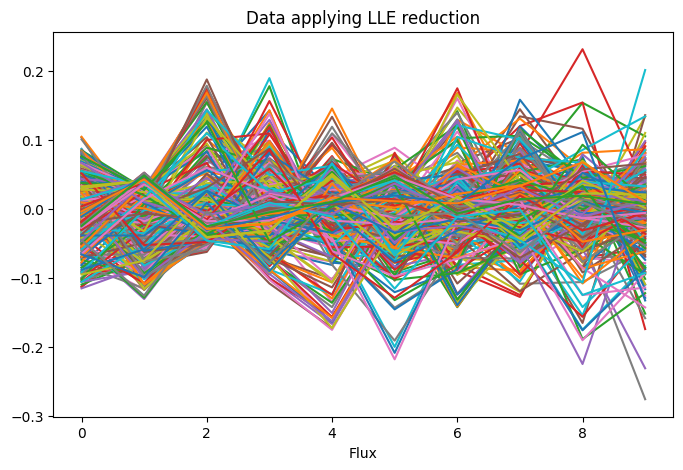

In [33]:
plt.figure(figsize=(8,5))
plt.title("Data applying LLE reduction")
plt.xlabel("Flux")
plt.plot(lle_transformed_data_t.iloc[:,:])
plt.show()

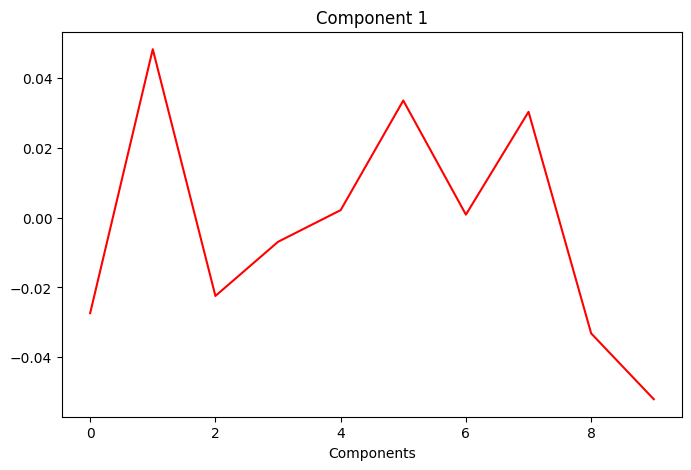

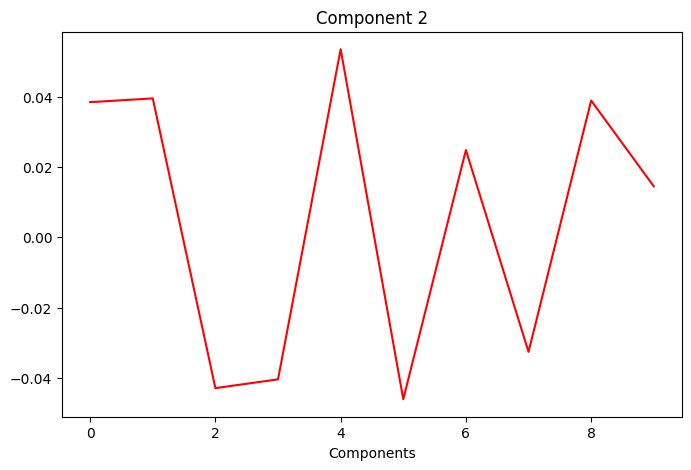

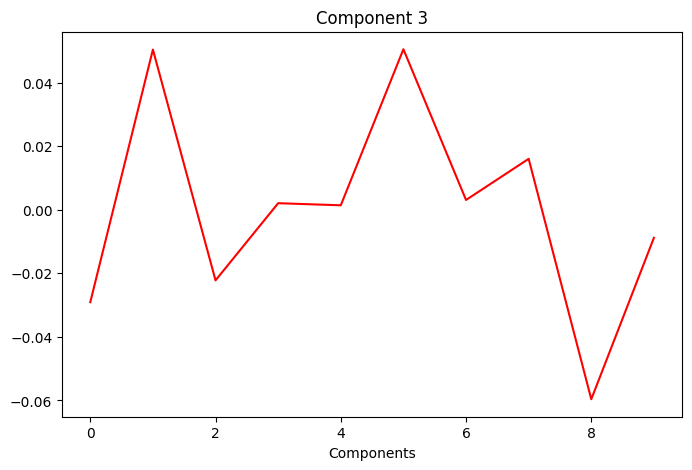

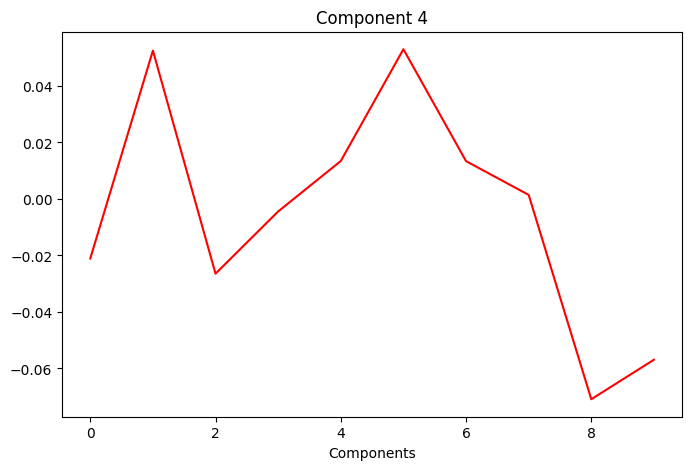

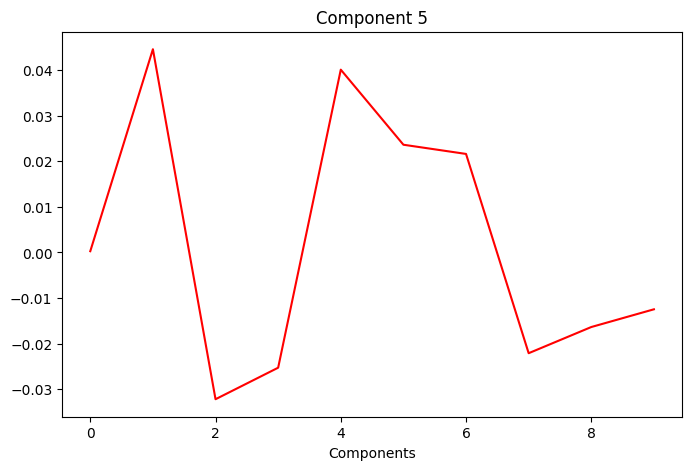

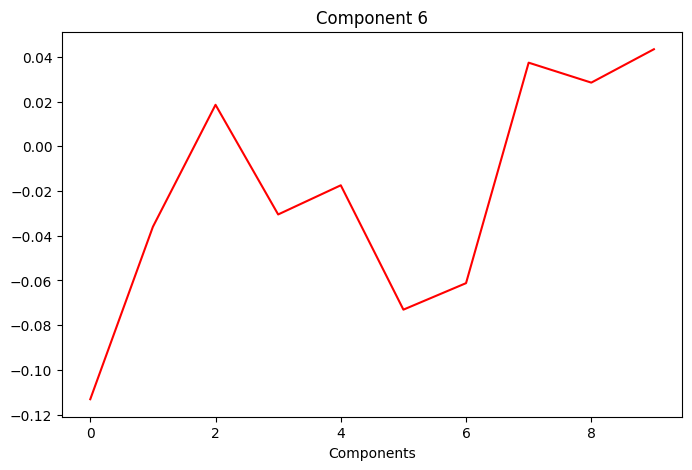

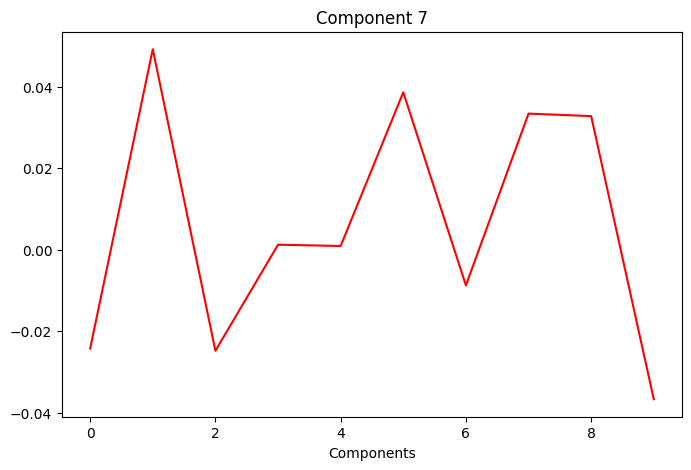

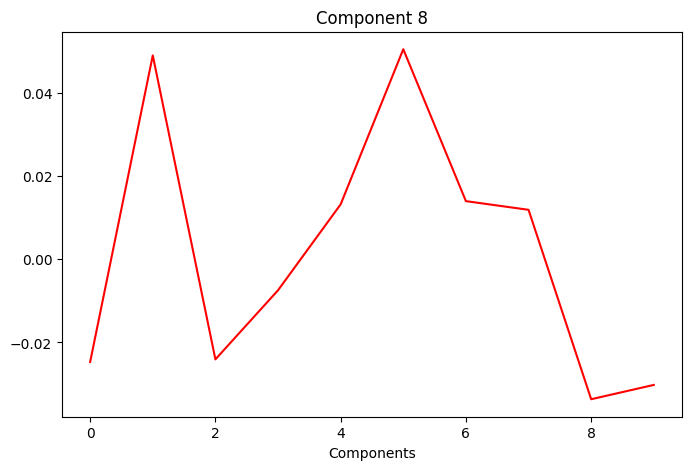

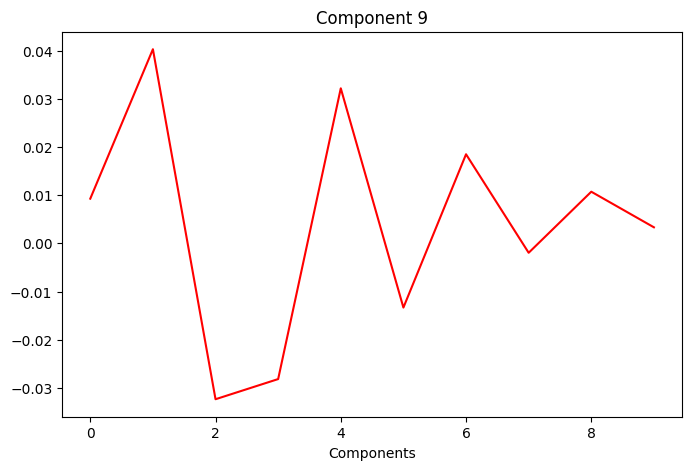

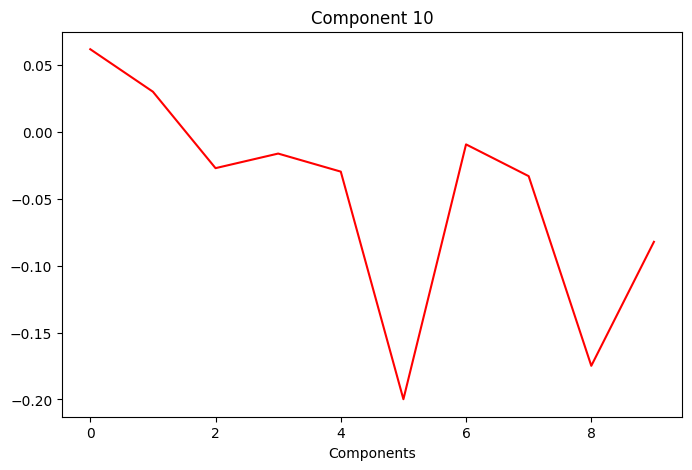

In [35]:
for i in range(1,11):
    plt.figure(figsize=(8,5))
    plt.title(f"Component {i}")
    plt.xlabel("Components")
    plt.plot(lle_transformed_data_t.iloc[:, i-1:i], '-',markersize=1, color = "r")
    plt.show()

In [36]:
# Perform HLLE on the data
#for method hessian, n_neighbours must be a greater than [n_components * (n_components +3) /2 ]
hlle = LocallyLinearEmbedding(n_components=10, n_neighbors=80, method='hessian', eigen_solver='dense')
hlle_transformed = hlle.fit_transform(data)
hlle_transformed_data = pd.DataFrame(hlle_transformed)

In [37]:
hlle_transformed_data

0         1         2         3         4         5         6  \
0    0.034330  0.038589 -0.026475  0.024234  0.003940  0.015009  0.010423   
1    0.053642 -0.020993 -0.012824  0.040277  0.023126 -0.027785 -0.047978   
2    0.035434  0.040461 -0.031261  0.020986  0.008386  0.020796  0.012279   
3    0.040453  0.033201 -0.033021  0.026495  0.018727  0.019988  0.001845   
4    0.041843  0.012711 -0.026013  0.031620  0.023754  0.001566 -0.023445   
..        ...       ...       ...       ...       ...       ...       ...   
418  0.051292 -0.012953 -0.018235  0.034799  0.025580 -0.019908 -0.043159   
419  0.044707  0.004281 -0.006017  0.005742 -0.019337 -0.046463 -0.013150   
420  0.041447  0.024228 -0.024511  0.027002  0.009792  0.007339  0.005546   
421  0.039242  0.016600 -0.018518  0.030244  0.007617 -0.001557 -0.010082   
422  0.035228  0.036256 -0.029650  0.024064  0.007886  0.016781  0.007127   

            7         8         9  
0   -0.025484 -0.008080 -0.026478  
1    0.024650  0.025751  0.024971  
2   -0.025504 -0.008958 -0.026455  
3   -0.025712 -0.007275 -0.025323  
4   -0.015229 -0.003429 -0.010086  
..        ...       ...       ...  
418  0.020500  0.022006  0.020717  
419  0.075410  0.070124  0.026046  
420 -0.021087 -0.000906 -0.026813  
421 -0.014650  0.000749 -0.018285  
422 -0.024724 -0.009471 -0.026504  

[423 rows x 10 columns]

In [38]:
hlle_transformed_data_t = hlle_transformed_data.T

In [39]:
hlle_transformed_data_t

0         1         2         3         4         5         6    \
0  0.034330  0.053642  0.035434  0.040453  0.041843 -0.085292  0.036532   
1  0.038589 -0.020993  0.040461  0.033201  0.012711  0.084737  0.036354   
2 -0.026475 -0.012824 -0.031261 -0.033021 -0.026013  0.027155 -0.029453   
3  0.024234  0.040277  0.020986  0.026495  0.031620  0.033960  0.021524   
4  0.003940  0.023126  0.008386  0.018727  0.023754 -0.092492  0.007162   
5  0.015009 -0.027785  0.020796  0.019988  0.001566 -0.022708  0.016491   
6  0.010423 -0.047978  0.012279  0.001845 -0.023445  0.071138  0.010444   
7 -0.025484  0.024650 -0.025504 -0.025712 -0.015229  0.033395 -0.021783   
8 -0.008080  0.025751 -0.008958 -0.007275 -0.003429  0.039958 -0.005036   
9 -0.026478  0.024971 -0.026455 -0.025323 -0.010086  0.029708 -0.026273   

        7         8         9    ...       413       414       415       416  \
0  0.035691  0.042089  0.055018  ...  0.040718  0.017110  0.042551  0.021139   
1  0.035953  0.004708 -0.041956  ...  0.017343  0.055240  0.018309  0.034338   
2 -0.029550 -0.017110  0.028554  ... -0.012884 -0.021568 -0.026429 -0.025559   
3  0.024693  0.030494  0.009600  ... -0.037513  0.008877  0.015997  0.028294   
4  0.012105  0.013247 -0.052096  ... -0.044954 -0.013558  0.010328  0.019348   
5  0.017598 -0.011479 -0.112627  ... -0.039402  0.014990  0.002359  0.013349   
6  0.004978 -0.025091 -0.027449  ...  0.023312  0.022080 -0.006784  0.004279   
7 -0.027348  0.000362  0.167723  ...  0.105624 -0.022418  0.006255 -0.027410   
8 -0.010274  0.009323  0.146235  ...  0.090368 -0.016207  0.015907 -0.014719   
9 -0.025378 -0.003334  0.080880  ...  0.012577 -0.008589 -0.009757 -0.009892   

        417       418       419       420       421       422  
0 -0.135964  0.051292  0.044707  0.041447  0.039242  0.035228  
1 -0.027207 -0.012953  0.004281  0.024228  0.016600  0.036256  
2  0.017901 -0.018235 -0.006017 -0.024511 -0.018518 -0.029650  
3  0.081747  0.034799  0.005742  0.027002  0.030244  0.024064  
4  0.066574  0.025580 -0.019337  0.009792  0.007617  0.007886  
5 -0.015282 -0.019908 -0.046463  0.007339 -0.001557  0.016781  
6 -0.062022 -0.043159 -0.013150  0.005546 -0.010082  0.007127  
7  0.017573  0.020500  0.075410 -0.021087 -0.014650 -0.024724  
8 -0.003061  0.022006  0.070124 -0.000906  0.000749 -0.009471  
9 -0.007292  0.020717  0.026046 -0.026813 -0.018285 -0.026504  

[10 rows x 423 columns]

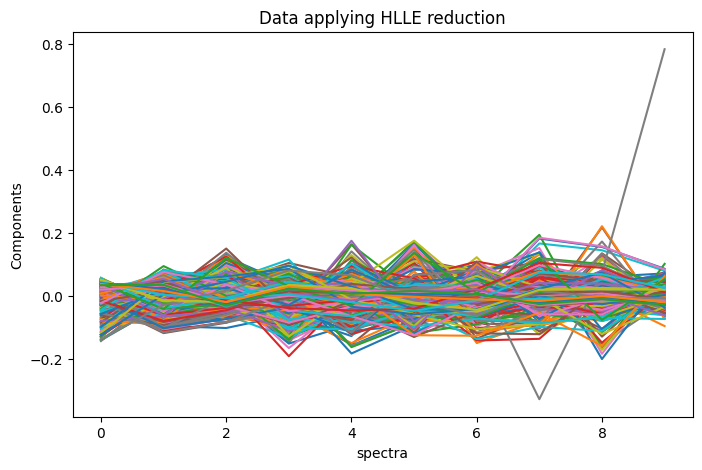

In [41]:
plt.figure(figsize=(8,5))
plt.title("Data applying HLLE reduction")
plt.xlabel("spectra")
plt.ylabel("Components")
plt.plot(hlle_transformed_data_t.iloc[:,:])
plt.show()

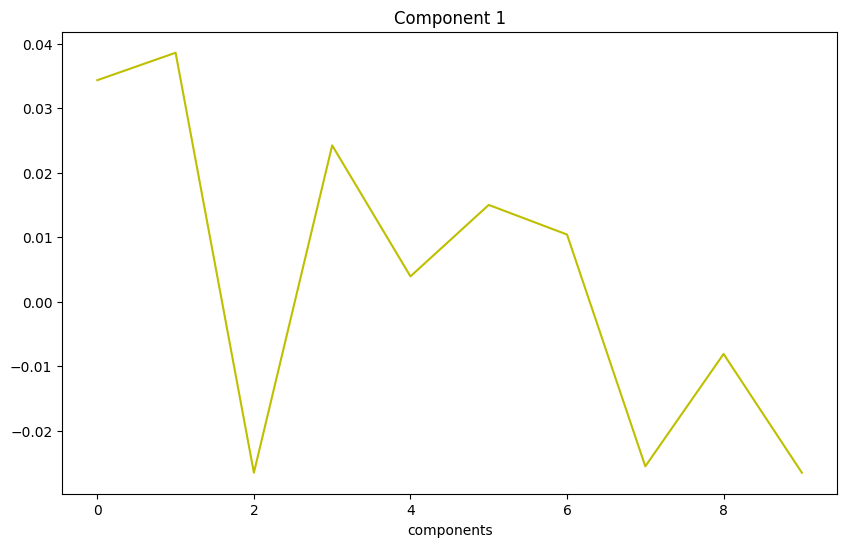

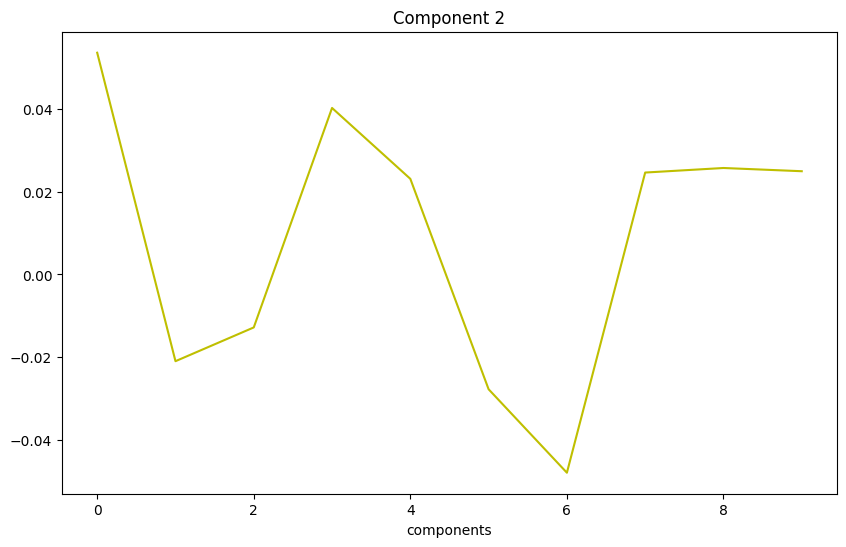

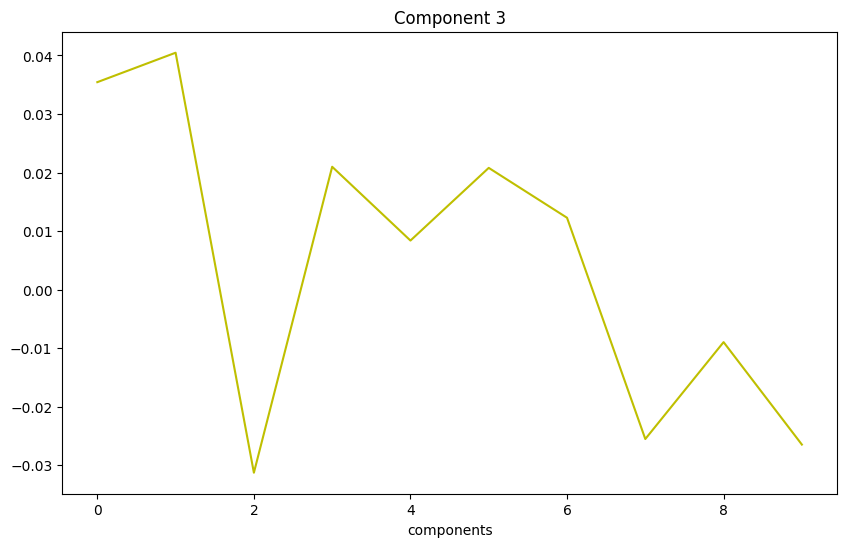

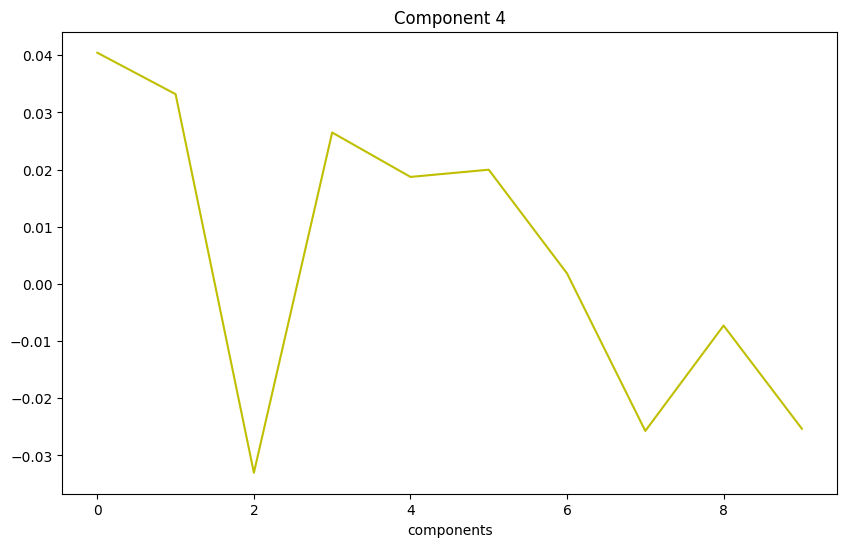

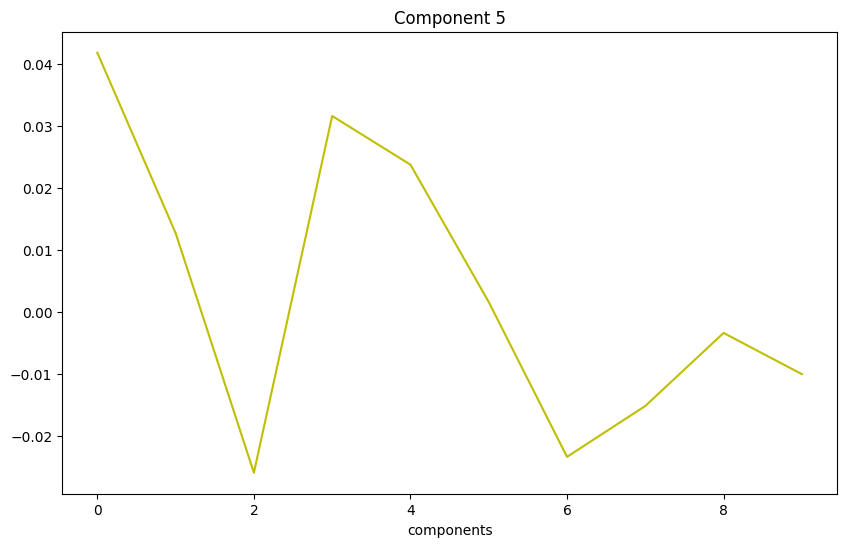

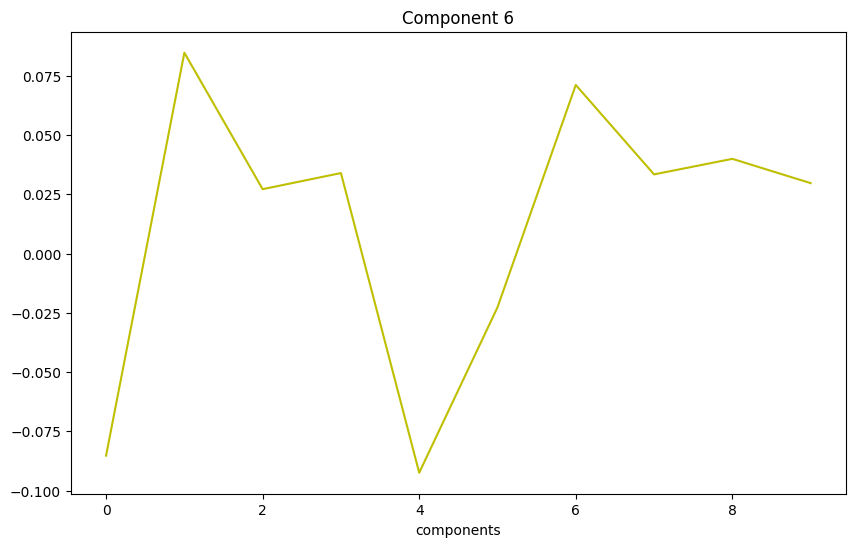

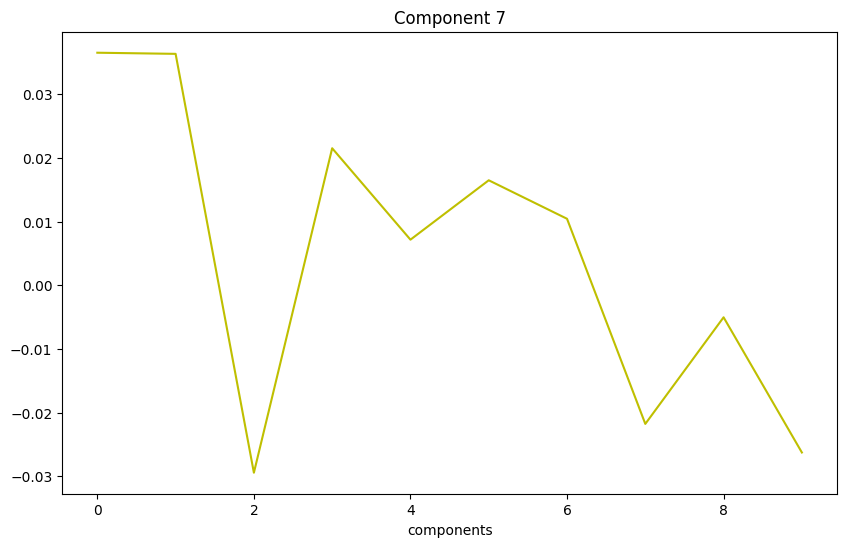

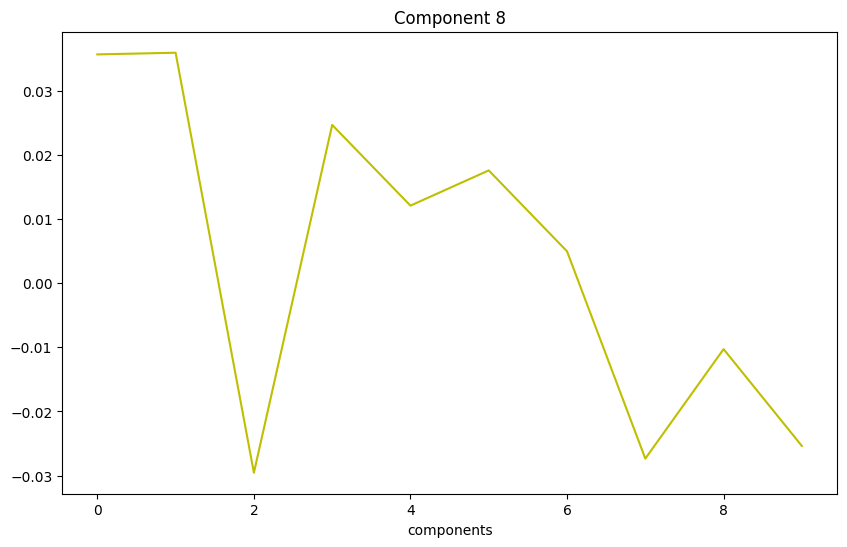

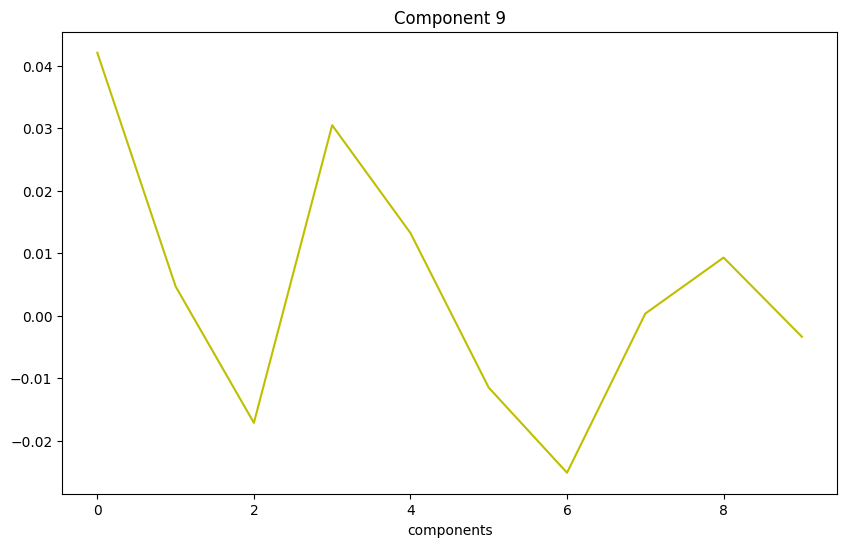

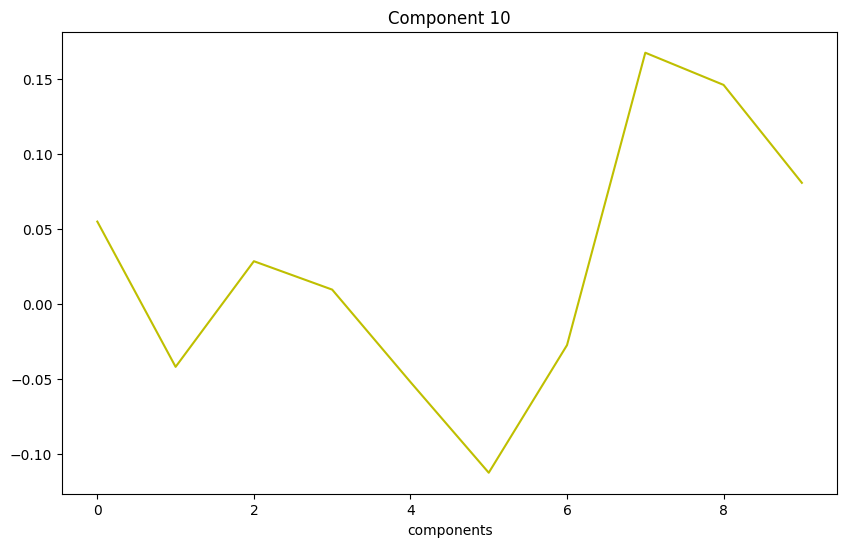

In [44]:
for i in range(1,11):
    plt.figure(figsize=(10,6))
    plt.title(f"Component {i}")
    plt.xlabel("components")
    plt.plot(hlle_transformed_data_t.iloc[:, i-1:i], '-',markersize=1, color = "y")
    plt.show()

C:\Users\joshp\AppData\Local\Temp\ipykernel_5152\3435062541.py:27: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


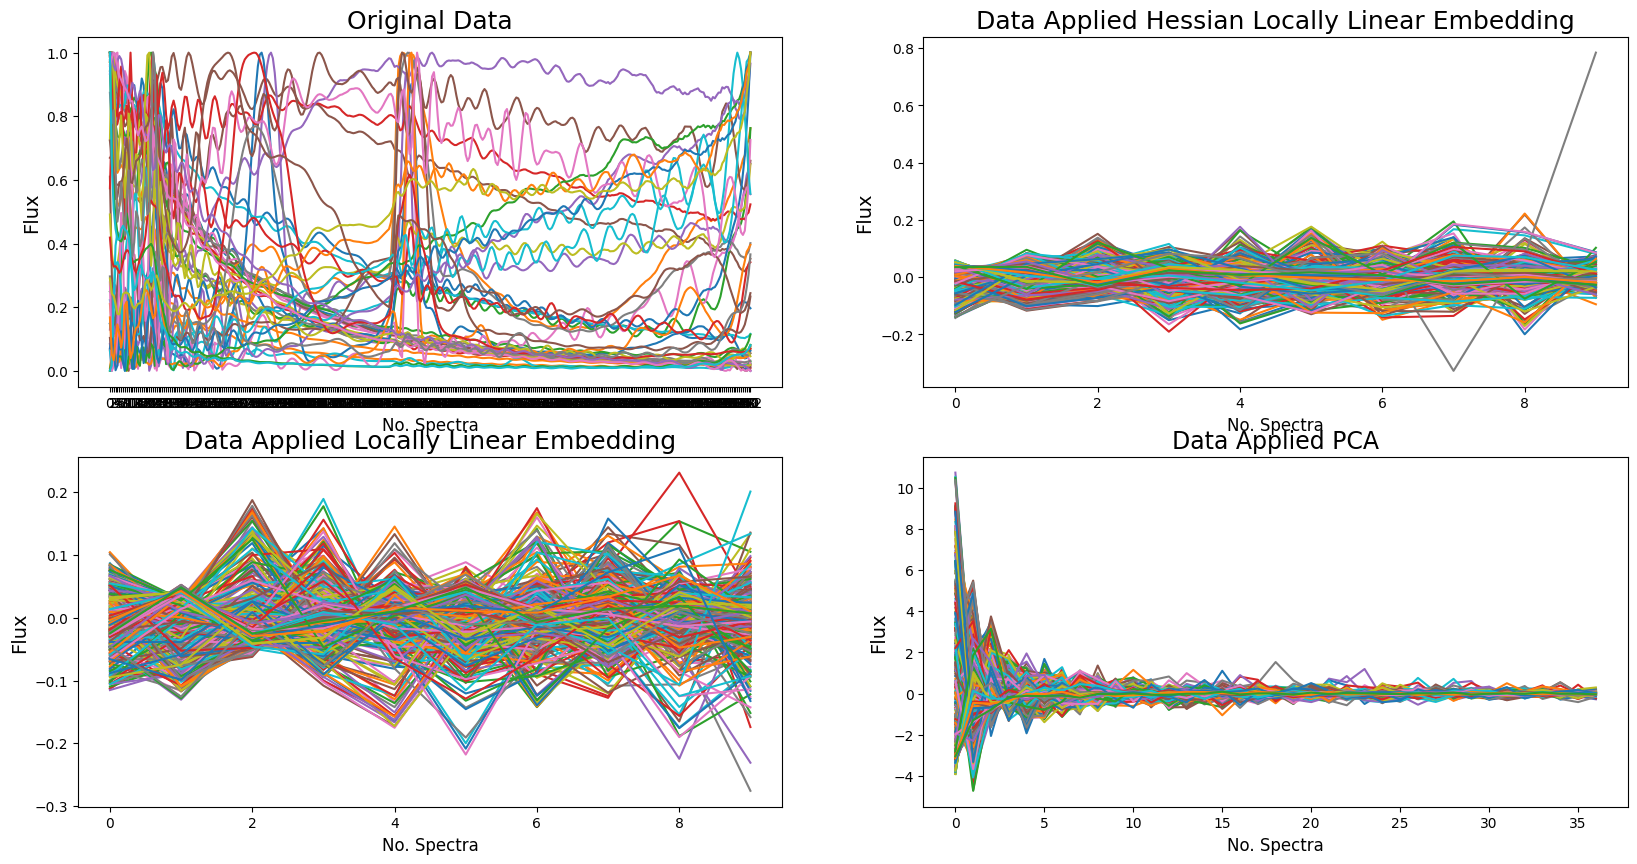

In [46]:
#comparison of original data and data applying dimensionality reduction

fig =  plt.figure(figsize=(20,10))
ax = fig.subplots(2,2)
ax[0,0].set_title("Original Data", fontsize=18)
ax[0,0].set_ylabel("Flux", fontsize=14)
ax[0,0].set_xlabel("No. Spectra", fontsize=12)
ax[0,0].plot(data_t.iloc[:,:50])#.iloc[0:423,0:15])

ax[0,1].set_title("Data Applied Hessian Locally Linear Embedding", fontsize=18)
ax[0,1].set_ylabel("Flux", fontsize=14)
ax[0,1].set_xlabel("No. Spectra", fontsize=12)
ax[0,1].plot(hlle_transformed_data_t)


ax[1,0].set_title("Data Applied Locally Linear Embedding", fontsize=18)
ax[1,0].set_ylabel("Flux", fontsize=14)
ax[1,0].set_xlabel("No. Spectra", fontsize=12)
ax[1,0].plot(lle_transformed_data_t)

#PCA
ax[1,1].set_title("Data Applied PCA", fontsize=17)
ax[1,1].set_ylabel("Flux", fontsize=14)
ax[1,1].set_xlabel("No. Spectra", fontsize=12)
ax[1,1].plot(pca_transformed_data_t)

fig.show()

C:\Users\joshp\AppData\Local\Temp\ipykernel_24832\2048829709.py:27: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


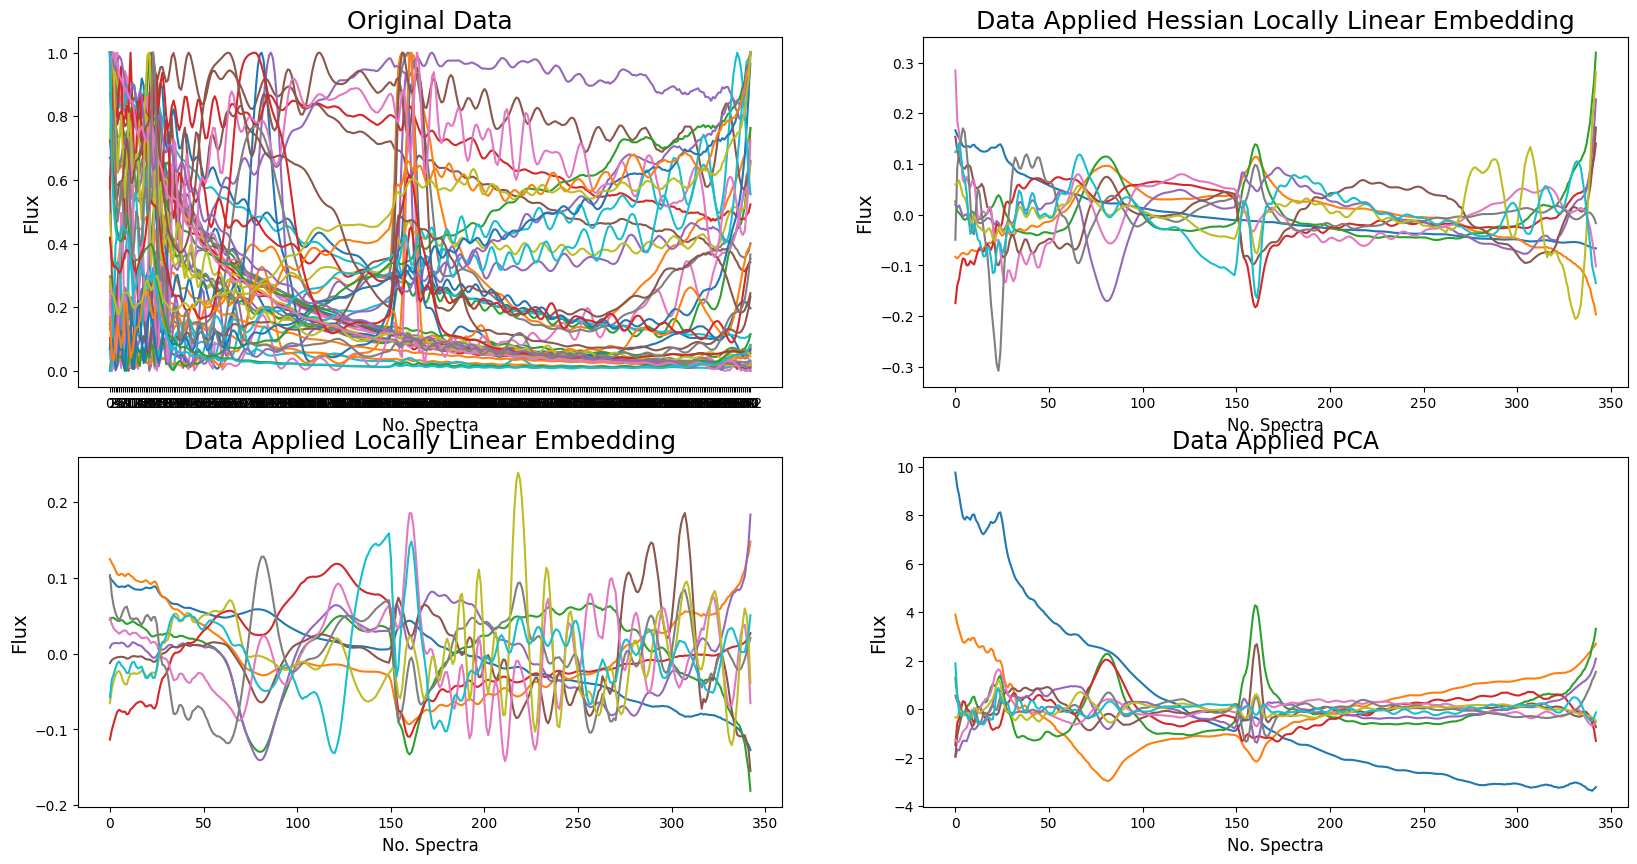

In [59]:
#comparison of original data and data applying dimensionality reduction

fig =  plt.figure(figsize=(20,10))
ax = fig.subplots(2,2)
ax[0,0].set_title("Original Data", fontsize=18)
ax[0,0].set_ylabel("Flux", fontsize=14)
ax[0,0].set_xlabel("No. Spectra", fontsize=12)
ax[0,0].plot(data_t.iloc[:,:50])#.iloc[0:423,0:15])

ax[0,1].set_title("Data Applied Hessian Locally Linear Embedding", fontsize=18)
ax[0,1].set_ylabel("Flux", fontsize=14)
ax[0,1].set_xlabel("No. Spectra", fontsize=12)
ax[0,1].plot(hlle_transformed_data)


ax[1,0].set_title("Data Applied Locally Linear Embedding", fontsize=18)
ax[1,0].set_ylabel("Flux", fontsize=14)
ax[1,0].set_xlabel("No. Spectra", fontsize=12)
ax[1,0].plot(lle_transformed_data)

#PCA
ax[1,1].set_title("Data Applied PCA", fontsize=17)
ax[1,1].set_ylabel("Flux", fontsize=14)
ax[1,1].set_xlabel("No. Spectra", fontsize=12)
ax[1,1].plot(pca_transformed_data)

fig.show()

In [62]:
lle_transformed_data.to_csv("output/DATA_LLE_NP.csv", index=False)

In [63]:
hlle_transformed_data.to_csv("output/DATA_HESSIAN_NP.csv", index=False)

In [64]:
pca_transformed_data.to_csv("output/DATA_PCA.csv", index=False)